<a href="https://colab.research.google.com/github/JDM-ULL-93/Practica_TID/blob/master/1_PreprocesamientoDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índice

[Volver al índice](https://colab.research.google.com/github/JDM-ULL-93/Practica_TID/blob/master/Indice.ipynb)

# Introducción

Nuestros datos representan el conjunto de datos medidos por los 8 sensores del producto "[MYO armband](https://www.youtube.com/watch?v=jOEcsNmTk7g)"


Se trata de 8 sensores que individualmente miden los mismos músculos 8 veces en intervalos de 5 ms. Cada sensor recoge los grados en los que se encuentra girado el músculo esquelético. Este valor varía en un rango entre **[-128º,127º]** cada fila recoge 40ms de estas mediciones, por lo tanto, cada fila recoge 8 mediciones consecutivas de los 8 sensores, de forma que el formato de cada fila es la siguiente:​

    [8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][8sensores]​

Es decir, tenemos 64 predictores y una última variable que es la clase o el atributo a predecir. Según los valores de las 8 mediciones consecutivas de los 8 sensores sobre el musculo, se clasificará en una de las 4 gestos posibles identificados de la siguiente forma:
```c#
Enum {
  Roca = 0,
  Tijeras = 1,
  Papel = 2,
  Ok = 3
}
```
Esta clase corresponde con el tipo de gesto realizándose en posición fija en un lapso de tiempo de duración 40 ms.

Por lo tanto, el formato final de nuestro conjunto de datos es:​

    [8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][Gesto]​

Esto es cada fila. Nuestro conjunto de datos son 11678 filas. 


# Objetivo

Crear y entrenar un clasificador preciso capaz de diferenciar y reconocer los gestos ejecutados con un margen de error de 5%​. En este cuaderno en especifico, ejecutaremos un preprocesado de datos que permita a nuestros clasificadores mejorar sus resultados finales. 

# Carga y visualización de datos

Empezamos cargando nuestro datasheet a memoria . Este datasheet ha sido sacado de la pagina "Kaggle" y puede encontrarse en el siguiente enlace:

https://www.kaggle.com/kyr7plus/emg-4

El datasheet que se carga es el producto de unir los 4 conjunto de datos (cada uno por cada tipo de gesto) en uno solo.



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,26,4,5,8,-1,-13,-109,-66,-9,2,⋯,-28,61,4,8,5,4,-7,-59,16,0
2,-47,-6,-5,-7,13,-1,35,-10,10,-4,⋯,-25,47,6,6,5,13,21,111,15,0
3,-19,-8,-8,-8,-21,-6,-79,12,0,5,⋯,-83,7,7,1,-8,7,21,114,48,0
4,2,3,0,2,0,22,106,-14,-16,-2,⋯,-38,-11,4,7,11,33,39,119,43,0
5,6,0,0,-2,-14,10,-51,5,7,0,⋯,38,-35,-8,2,6,-13,-24,-112,-69,0
6,15,-5,-5,-15,12,-22,-38,36,9,6,⋯,-26,5,6,6,11,5,30,-48,25,0
7,-12,-5,-1,4,-16,-17,-69,-16,-12,-3,⋯,1,-36,-10,-12,-16,-12,-47,6,-30,0
8,43,0,-2,6,11,26,51,27,-9,-2,⋯,41,15,4,10,25,9,13,73,47,0
9,-26,-9,-18,-60,-23,-35,-85,-40,27,10,⋯,-17,-7,-1,2,10,-6,7,-2,-1,0


       V1                  V2                  V3                 V4          
 Min.   :-116.0000   Min.   :-104.0000   Min.   :-33.0000   Min.   :-75.0000  
 1st Qu.:  -9.0000   1st Qu.:  -4.0000   1st Qu.: -3.0000   1st Qu.: -4.0000  
 Median :  -1.0000   Median :  -1.0000   Median : -1.0000   Median : -1.0000  
 Mean   :  -0.5204   Mean   :  -0.7268   Mean   : -0.7391   Mean   : -0.7298  
 3rd Qu.:   7.0000   3rd Qu.:   3.0000   3rd Qu.:  2.0000   3rd Qu.:  3.0000  
 Max.   : 111.0000   Max.   :  90.0000   Max.   : 34.0000   Max.   : 55.0000  
       V5                  V6                  V7                 V8           
 Min.   :-121.0000   Min.   :-122.0000   Min.   :-128.000   Min.   :-128.0000  
 1st Qu.: -10.0000   1st Qu.: -15.0000   1st Qu.:  -6.000   1st Qu.:  -8.0000  
 Median :   0.0000   Median :  -1.0000   Median :  -1.000   Median :  -1.0000  
 Mean   :  -0.1591   Mean   :  -0.5549   Mean   :  -1.273   Mean   :  -0.6618  
 3rd Qu.:  10.0000   3rd Qu.:  13.0000   3rd Qu

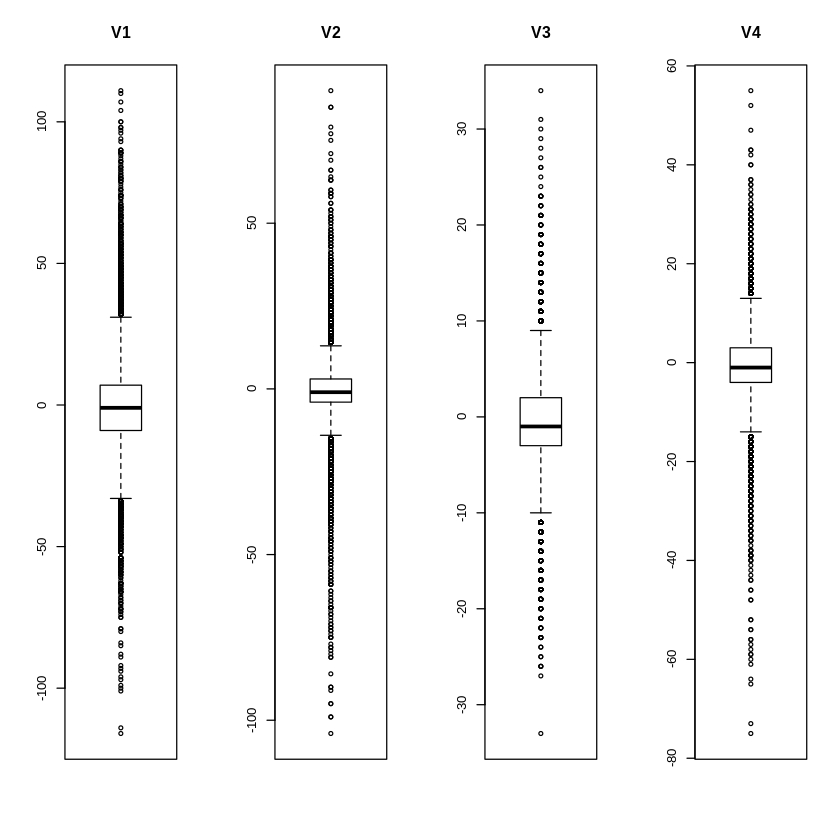

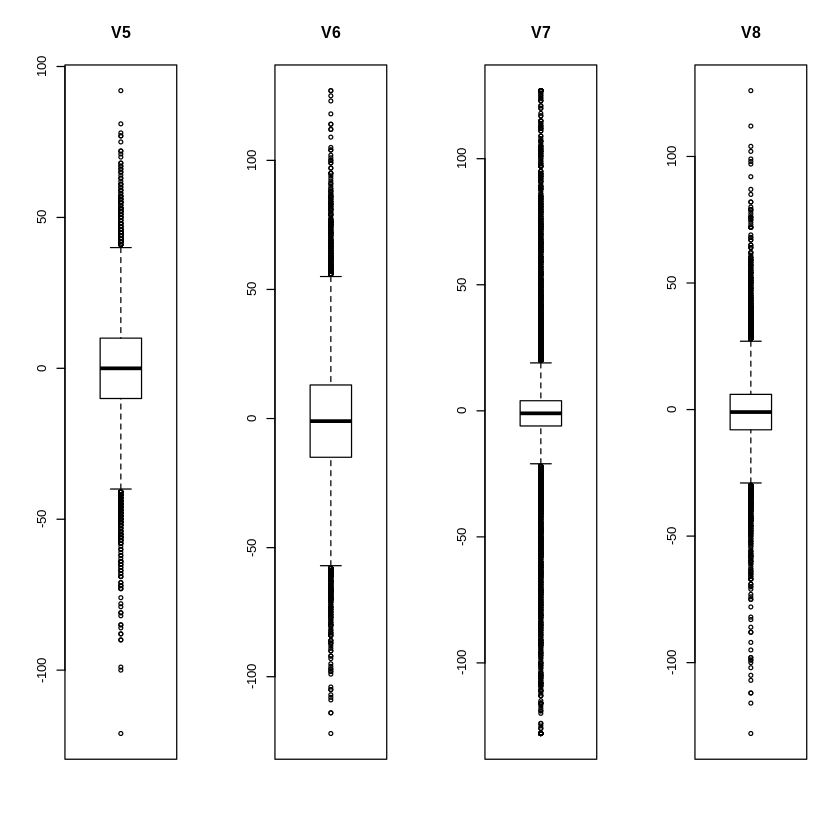

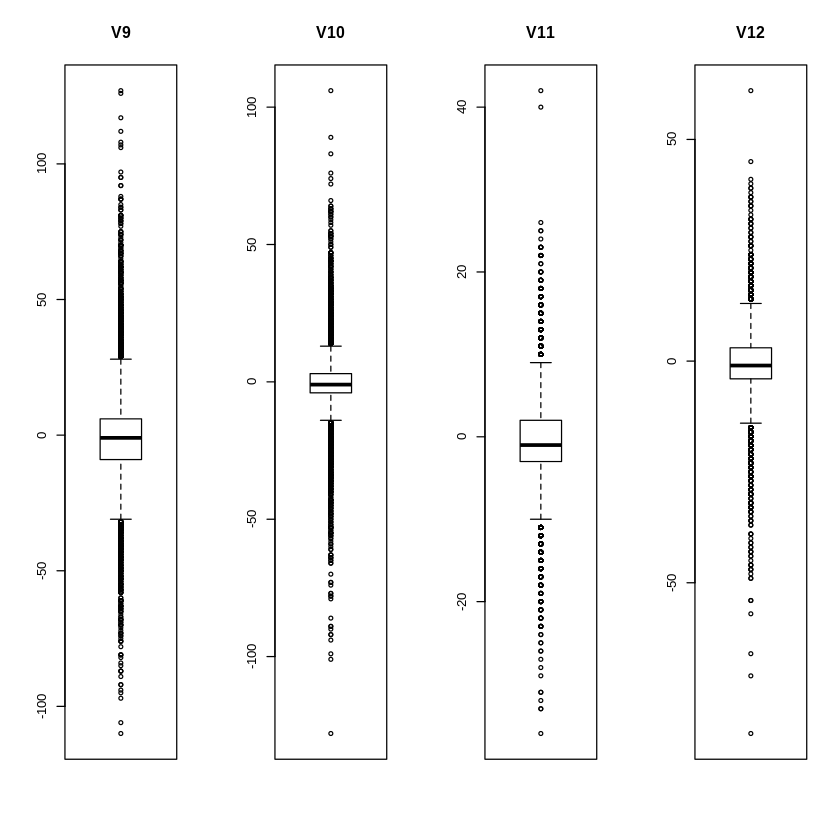

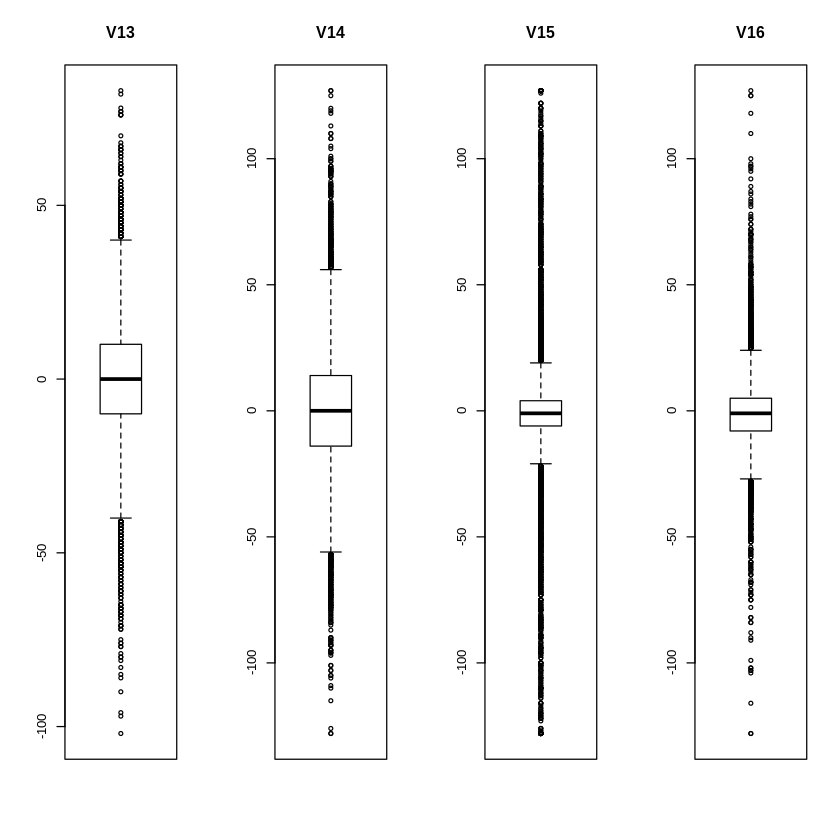

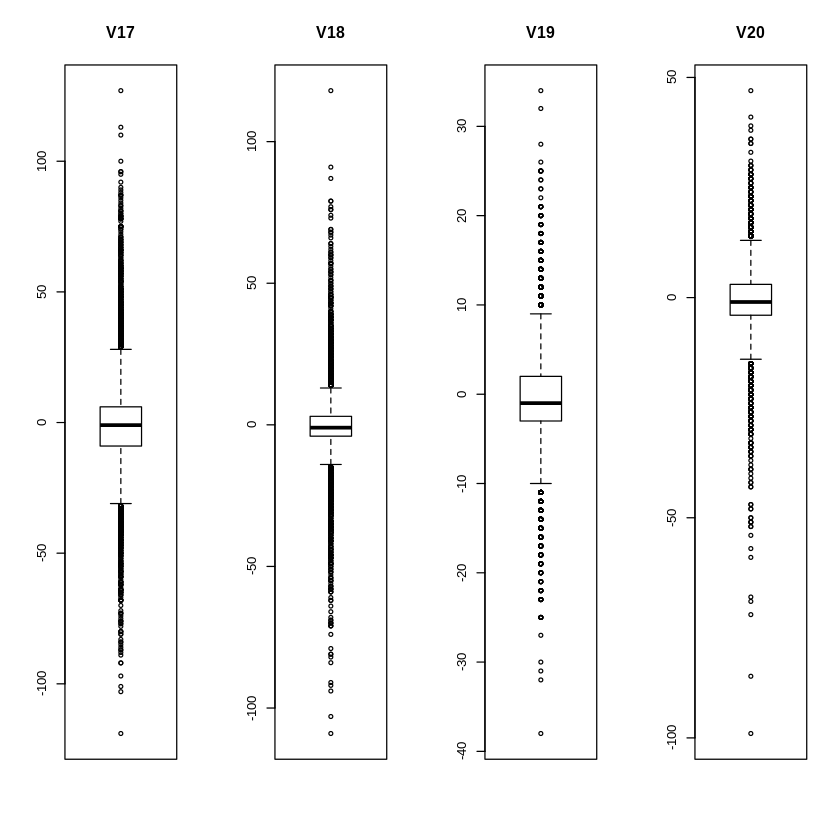

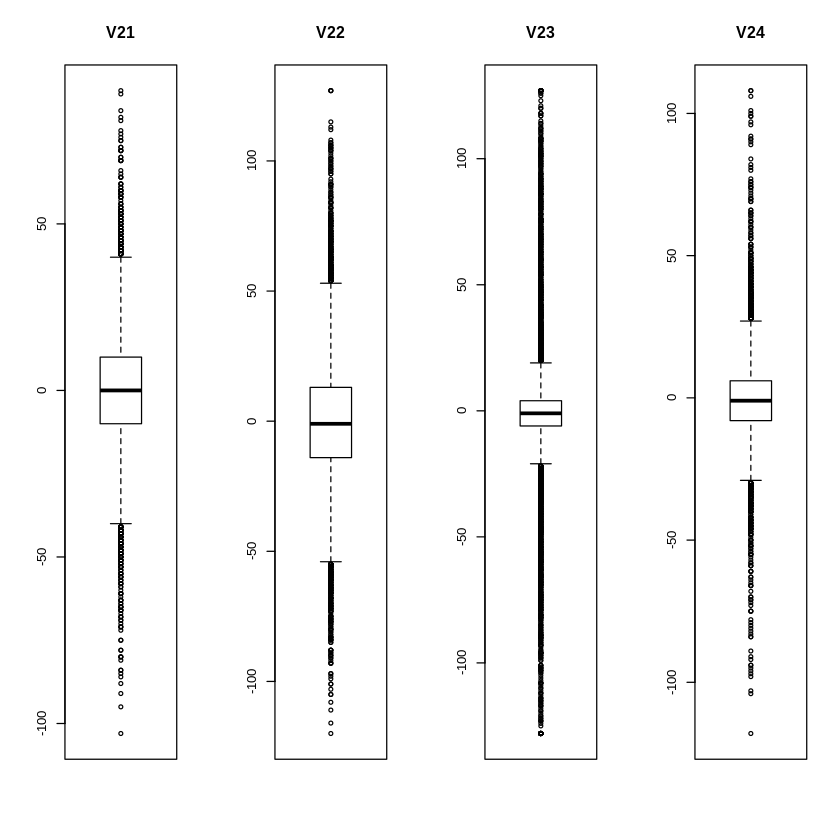

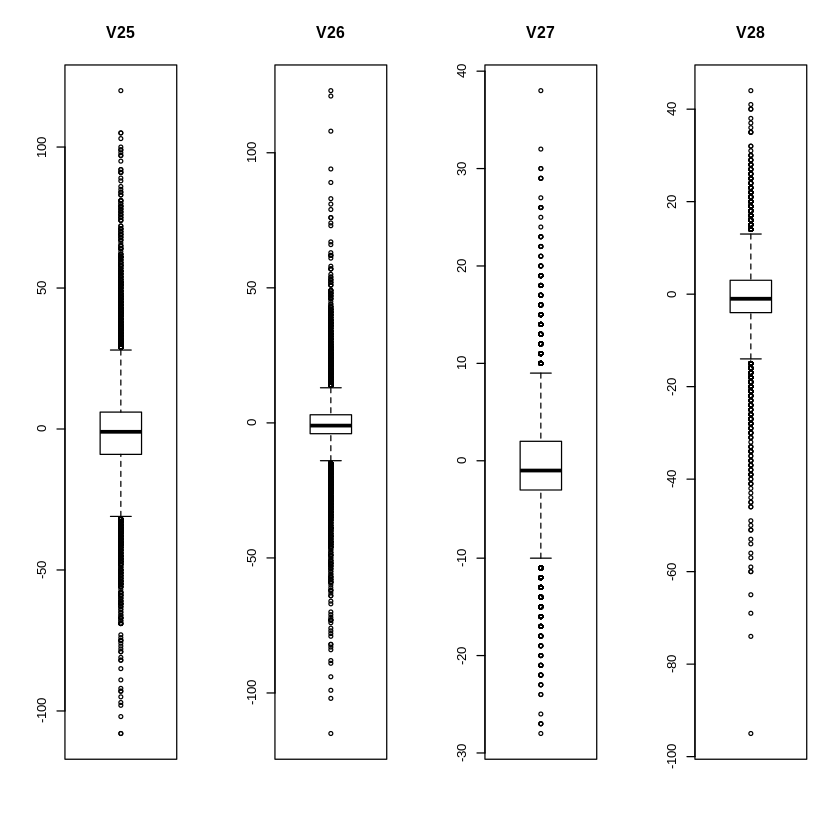

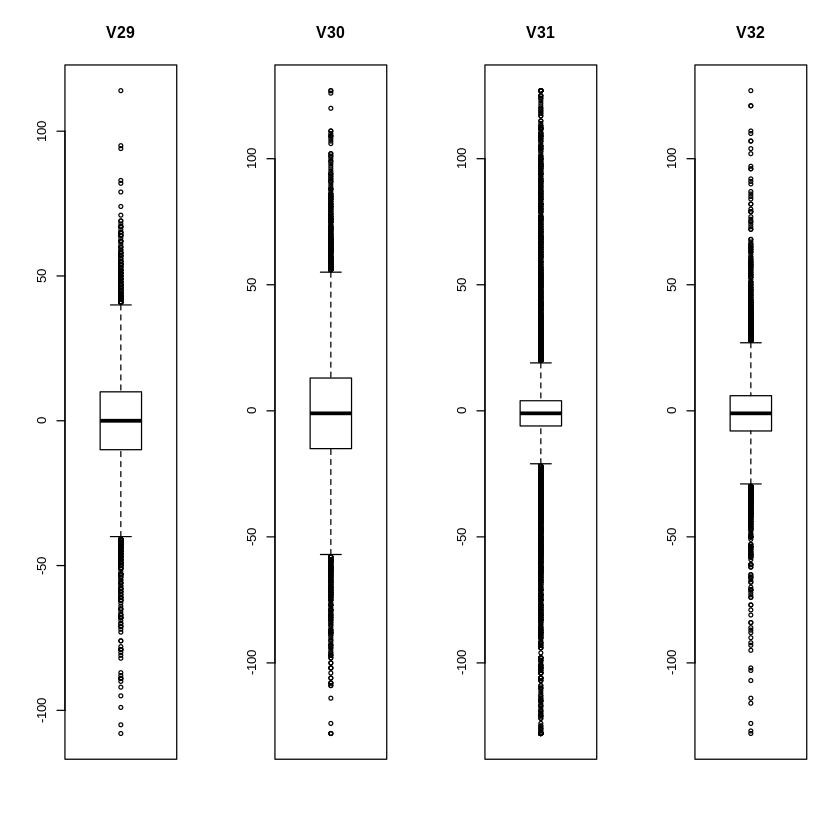

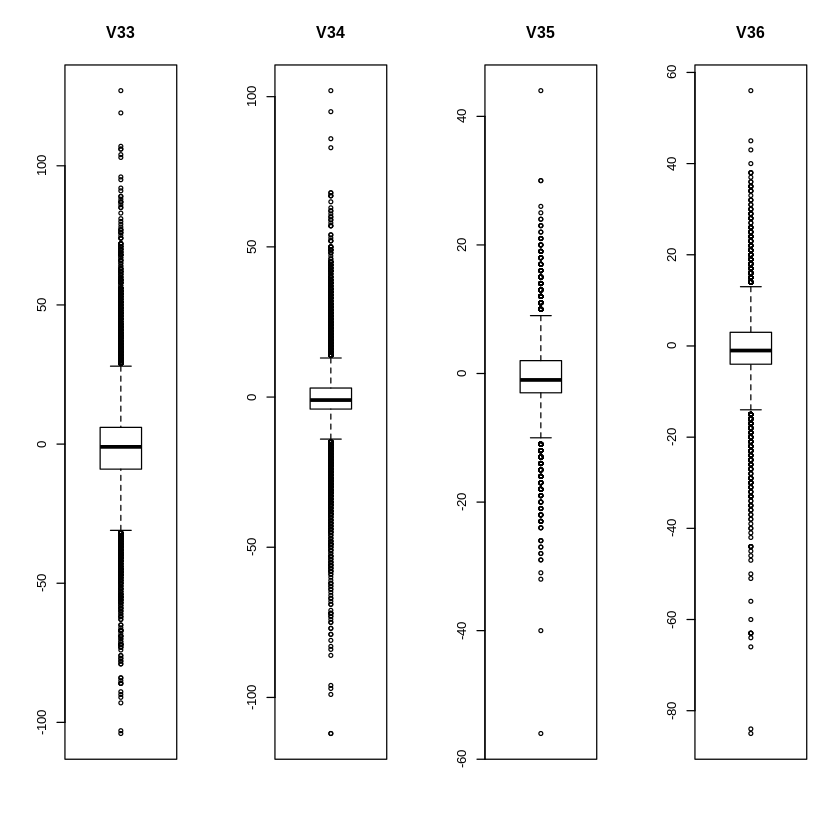

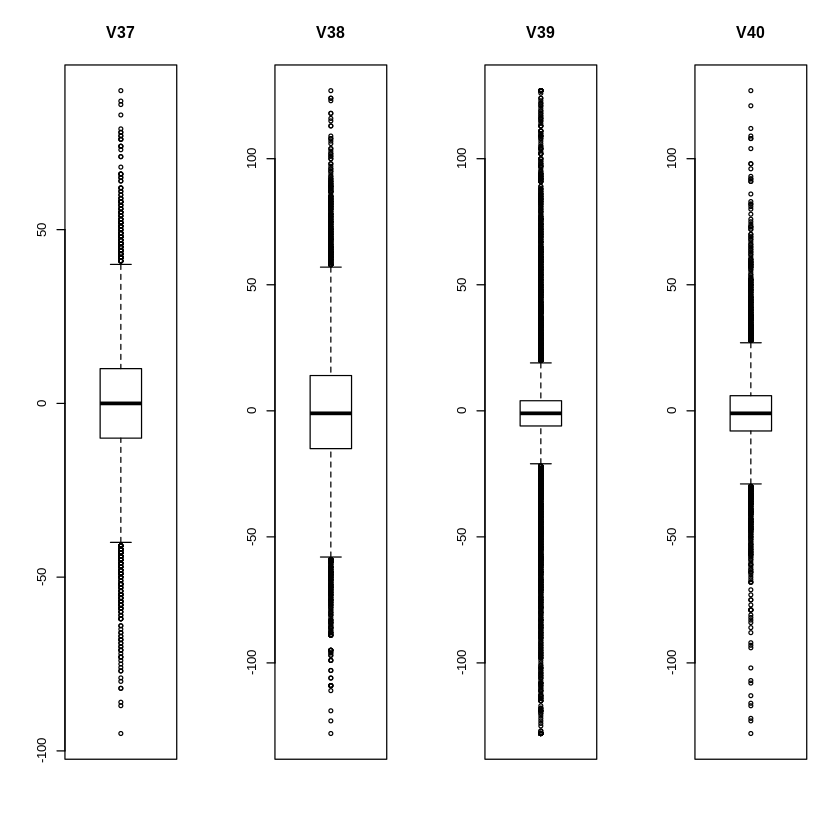

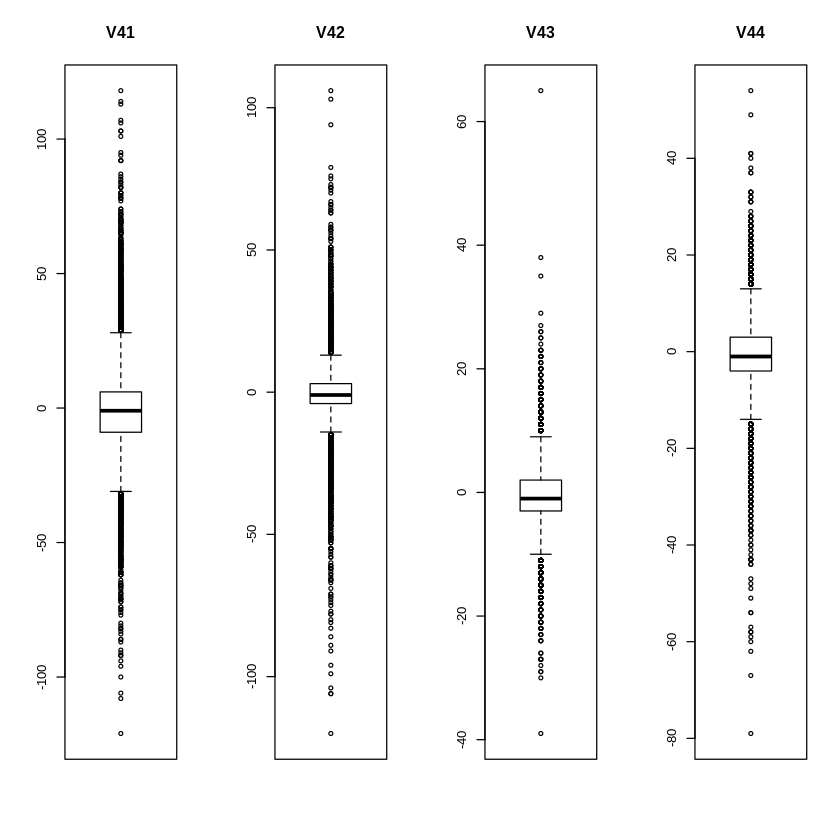

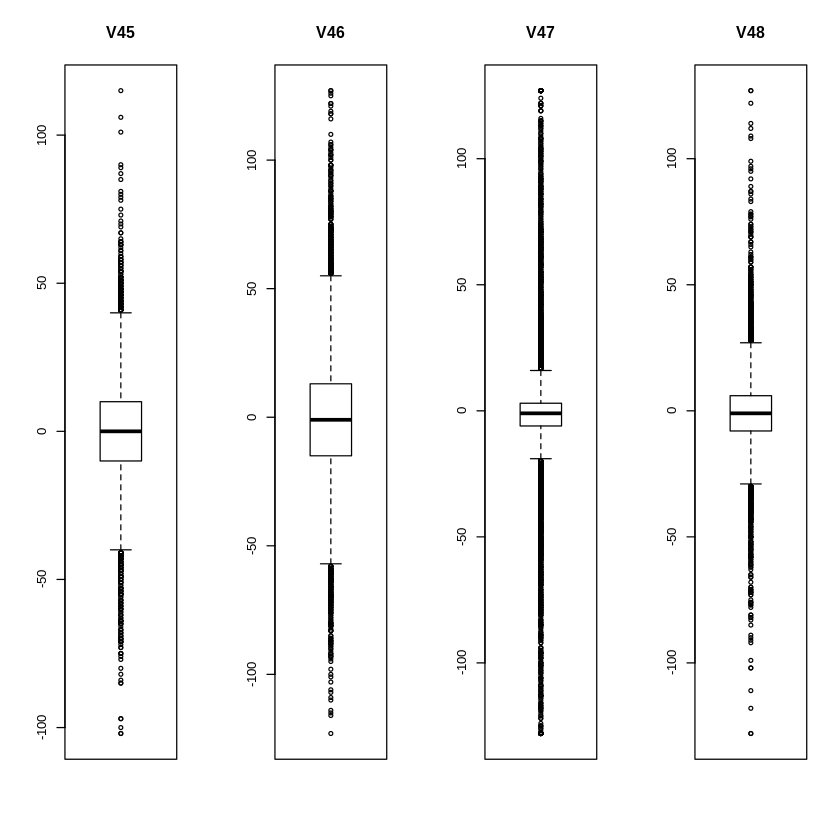

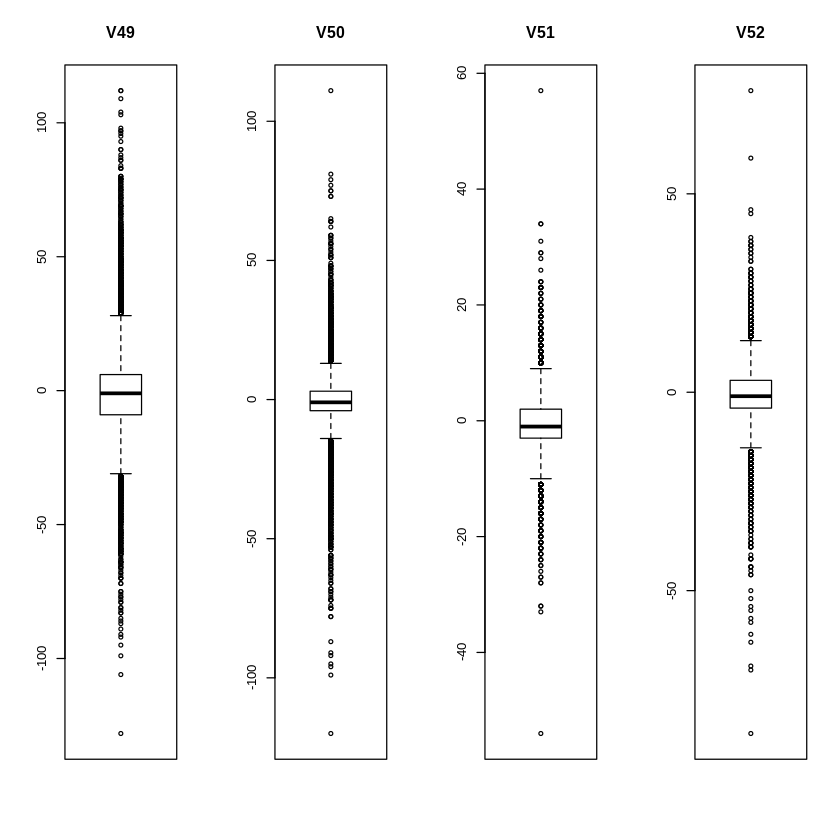

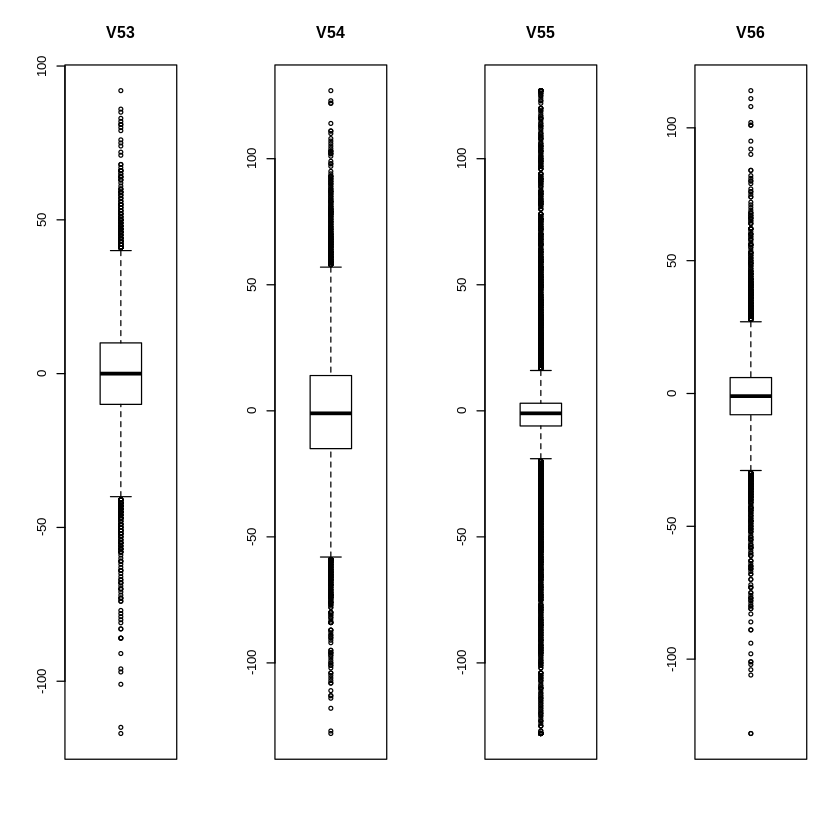

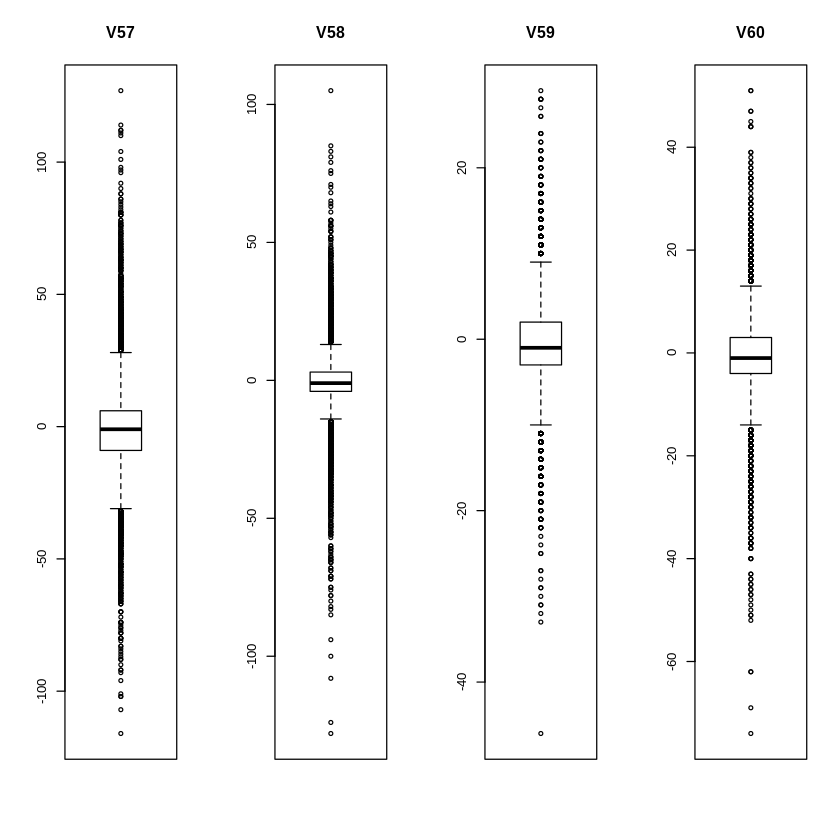

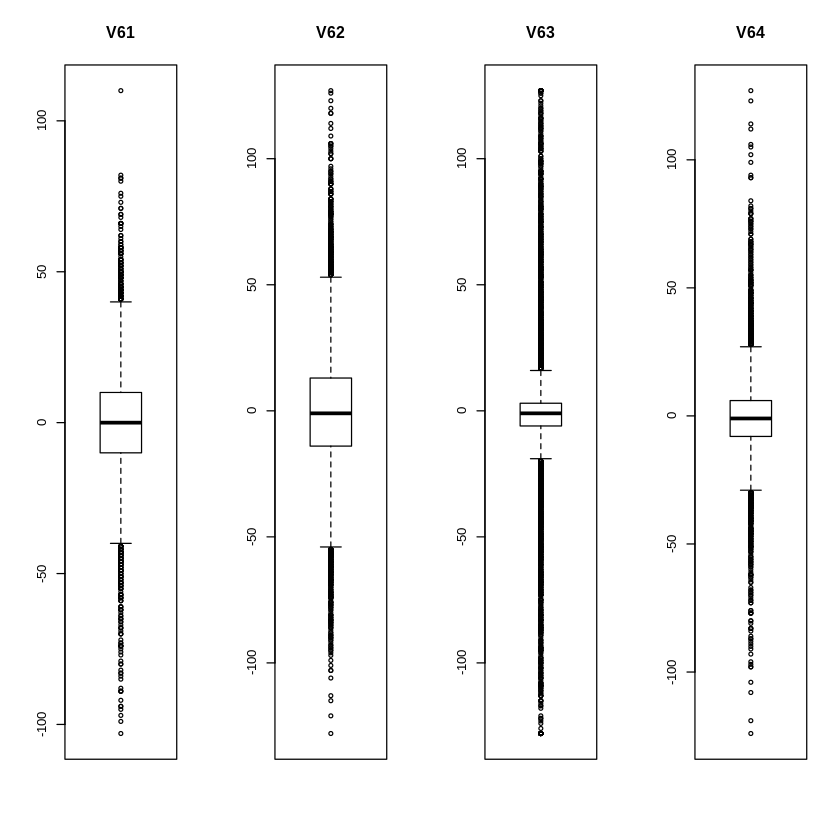

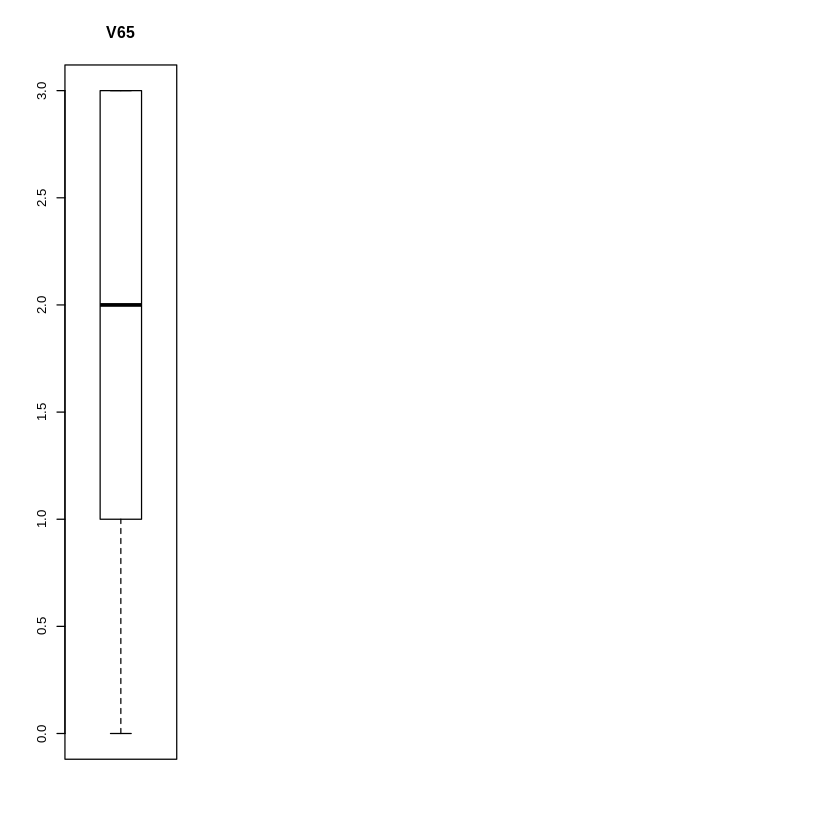

In [0]:
#Cargamos nuestros datos
dataRAW = read.csv("/content/all.csv",header=FALSE, sep=",")
#dataRAW = read.csv("https://www.dropbox.com/s/zwnnaudy9c42vtd/all.csv?dl=0", header=FALSE, sep = ",")
#ataRAW$V65 = as.factor(dataRAW$V65)
head(dataRAW,10)
summary(dataRAW)
par(mfrow=c(1,4))
for(i in 1:65) {
  lista <- boxplot(dataRAW[,i], main=names(dataRAW)[i])
  #outliers <- outliers + length(lista$out)
}


Escalamos los datos para asegurarnos que no hay ninguna magnitud con escalas diferentes al resto.

[1] 11678    65

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V56,V57,V58,V59,V60,V61,V62,V63,V64,
1.4283835,0.40170696,1.15012947,1.1730891,-0.04710804,-0.48219055,-4.293642,-4.24028809,-0.45983856,0.22415026,⋯,-1.7855609,3.3968017,0.39488063,1.7644141,0.7726201,0.2324183,-0.2592921,-2.27835691,1.06947819,0
-2.5033850,-0.44813614,-0.85390090,-0.8425861,0.73718804,-0.01724597,1.445703,-0.60602378,0.58850359,-0.28255256,⋯,-1.5876586,2.6277596,0.56147502,1.3619800,0.7726201,0.7368608,0.8365519,4.45172140,1.00508707,0
-0.9953094,-0.61810475,-1.45511001,-0.9769644,-1.16753100,-0.21097288,-3.097945,0.82172292,0.03674456,0.47750168,⋯,-5.4137702,0.4304965,0.64477221,0.3558947,-0.9878456,0.4005658,0.8365519,4.57048749,3.12999407,0
0.1357473,0.31672265,0.14811428,0.3668191,0.00891311,0.87389779,4.275519,-0.86561409,-0.84606988,-0.11365162,⋯,-2.4452353,-0.5582719,0.39488063,1.5631970,1.5851427,1.8578441,1.5410231,4.76843097,2.80803847,0
0.3511866,0.06176972,0.14811428,-0.1706943,-0.77538297,0.40895322,-1.981961,0.36743988,0.42297588,0.05524932,⋯,2.5682902,-1.8766298,-0.60468571,0.5571117,0.9080405,-0.7204175,-0.9246259,-4.37655780,-4.40376713,0
0.8359252,-0.36315183,-0.85390090,-1.9176128,0.68116689,-0.83089898,-1.463826,2.37926477,0.53332768,0.56195215,⋯,-1.6536260,0.3206333,0.56147502,1.3619800,1.5851427,0.2884675,1.1887875,-1.84288126,1.64899828,0
-0.6182905,-0.36315183,-0.05228875,0.6355757,-0.88742526,-0.63717207,-2.699379,-0.99540924,-0.62536627,-0.19810209,⋯,0.1274949,-1.9315614,-0.77128010,-2.2599270,-2.0712090,-0.6643683,-1.8247835,0.29490833,-1.89251340,0
2.3440008,0.06176972,-0.25269179,0.9043324,0.62514574,1.02887931,2.083408,1.79518657,-0.45983856,-0.11365162,⋯,2.7661925,0.8699491,0.39488063,2.1668482,3.4810288,0.5126641,0.5234537,2.94735096,3.06560295,0
-1.3723283,-0.70308906,-3.45914037,-7.9646384,-1.27957330,-1.33458893,-3.337084,-2.55295109,1.52649393,0.89975403,⋯,-1.0599191,-0.3385456,-0.02160534,0.5571117,1.4497223,-0.3280734,0.2886299,-0.02180124,-0.02517087,0
-1.8032070,0.31672265,1.95174161,3.9950344,0.34504000,-0.94713512,-4.891490,-0.02194558,0.69885539,-0.45145350,⋯,-0.3342772,2.2981702,0.06169185,-1.8574929,-2.2066295,1.1852541,0.1320808,1.72010138,0.74752258,0


       V1                 V2                 V3                 V4          
 Min.   :-6.21971   Min.   :-8.77660   Min.   :-6.46519   Min.   :-9.98031  
 1st Qu.:-0.45671   1st Qu.:-0.27817   1st Qu.:-0.45310   1st Qu.:-0.43945  
 Median :-0.02583   Median :-0.02321   Median :-0.05229   Median :-0.03632  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.40505   3rd Qu.: 0.31672   3rd Qu.: 0.54892   3rd Qu.: 0.50120  
 Max.   : 6.00647   Max.   : 7.71036   Max.   : 6.96182   Max.   : 7.48887  
       V5                  V6                 V7                 V8          
 Min.   :-6.769646   Min.   :-4.70544   Min.   :-5.05092   Min.   :-8.26394  
 1st Qu.:-0.551298   1st Qu.:-0.55968   1st Qu.:-0.18842   1st Qu.:-0.47623  
 Median : 0.008913   Median :-0.01725   Median : 0.01087   Median :-0.02195  
 Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.569125   3rd Qu.: 0.52519   3rd Qu.: 0.21015   3rd Qu.: 0.4

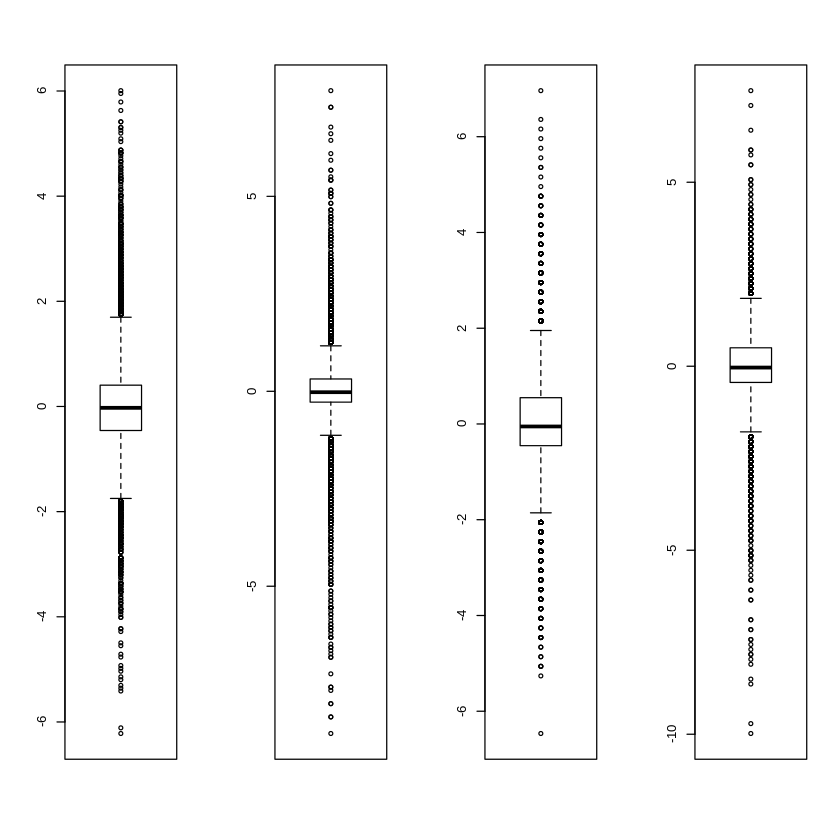

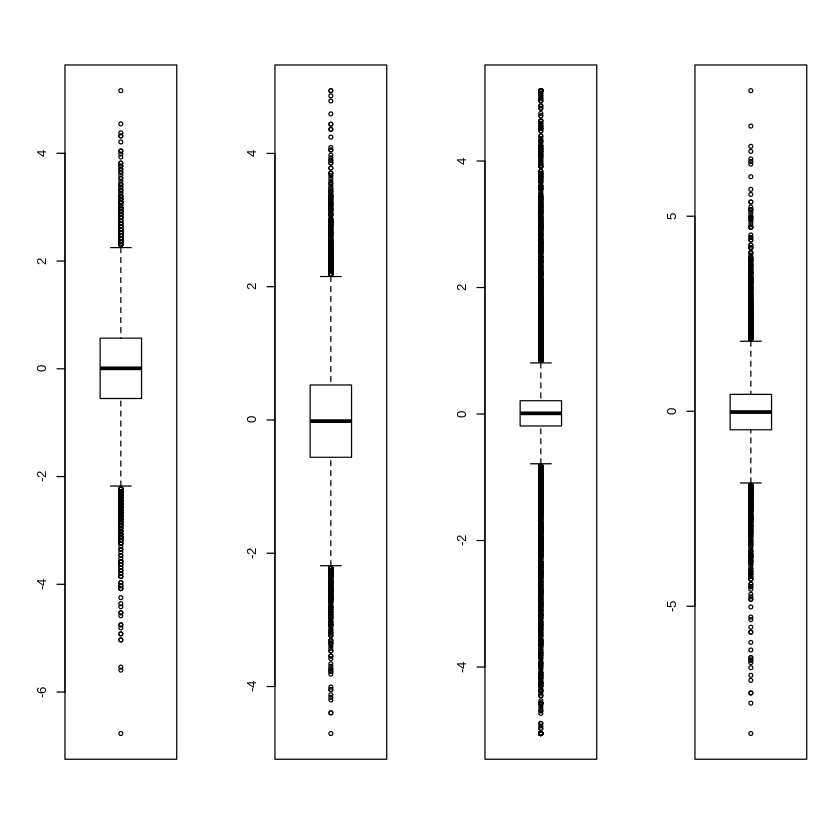

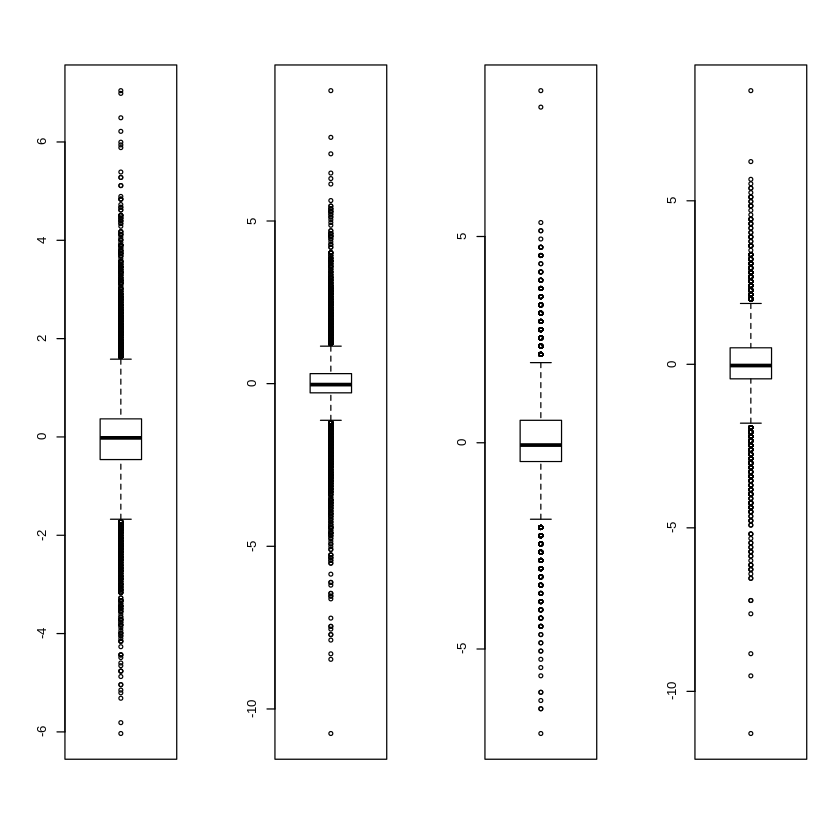

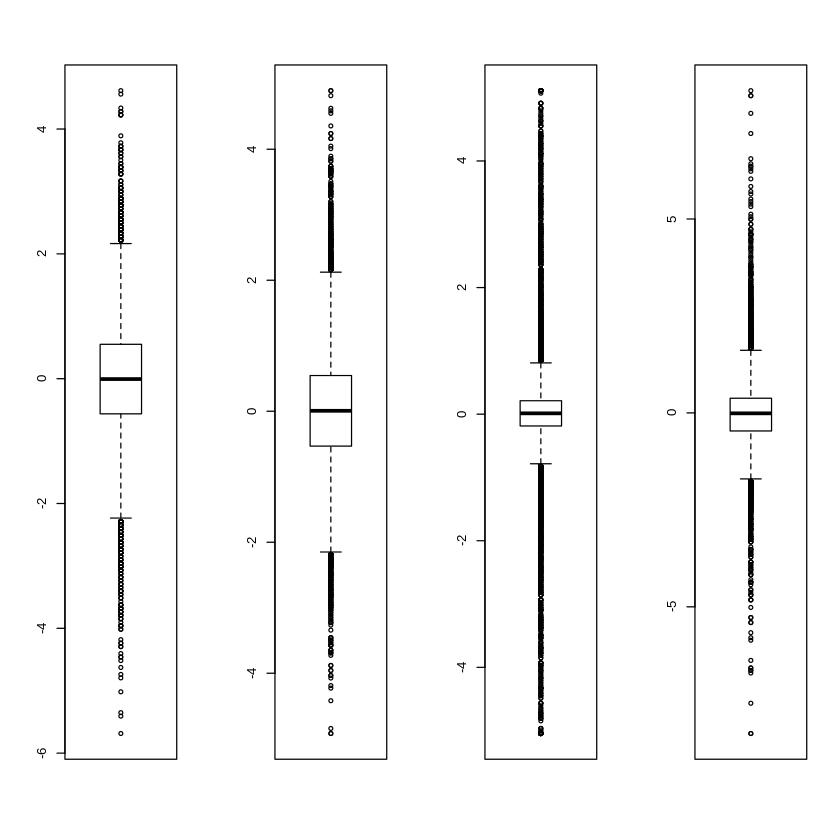

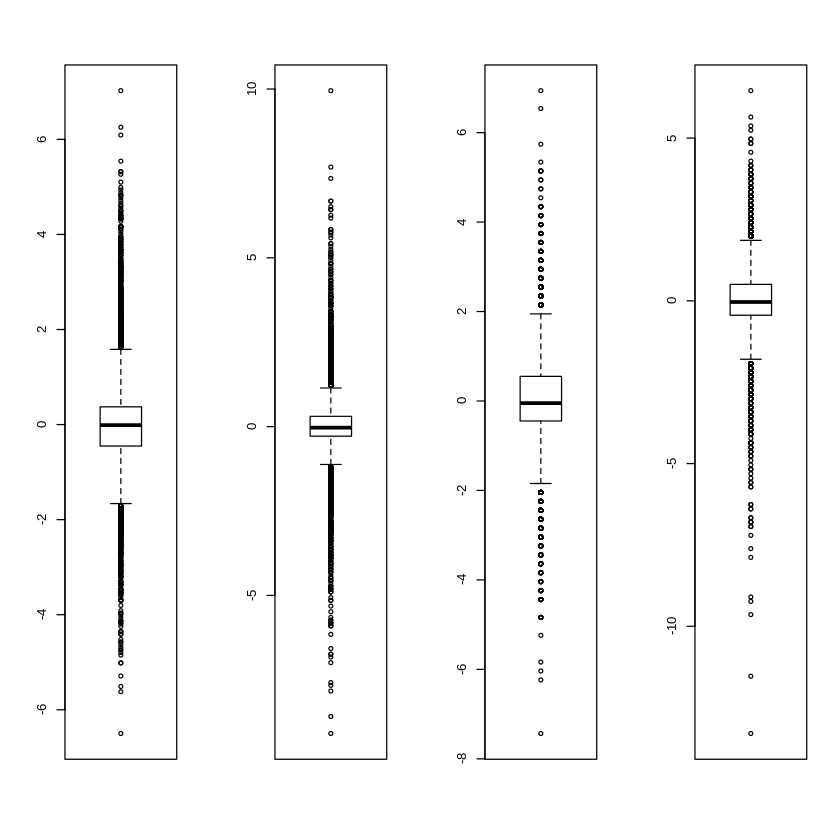

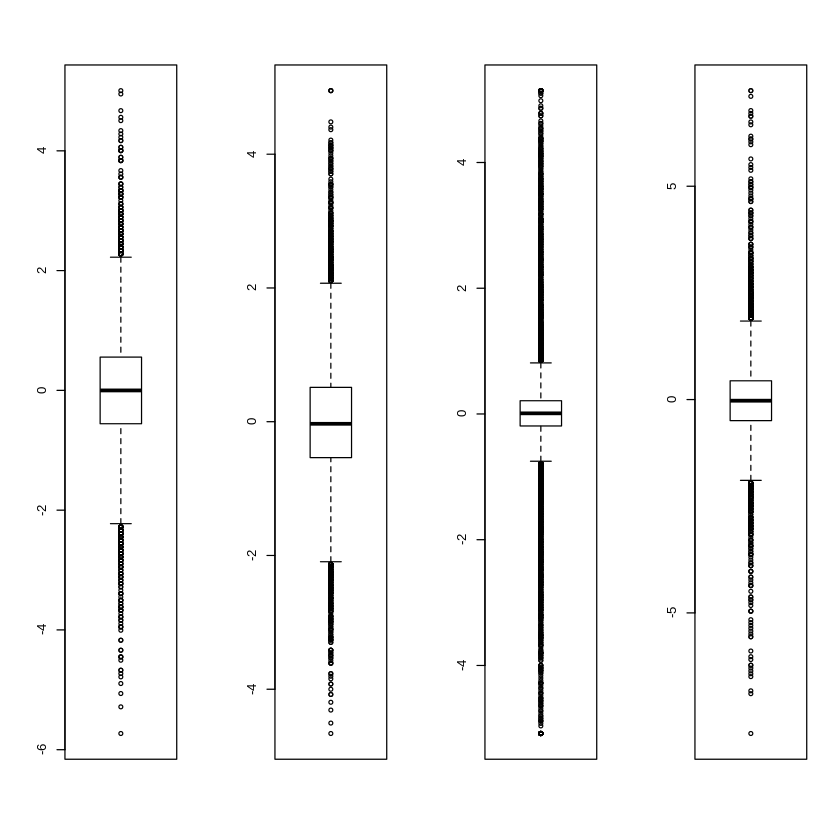

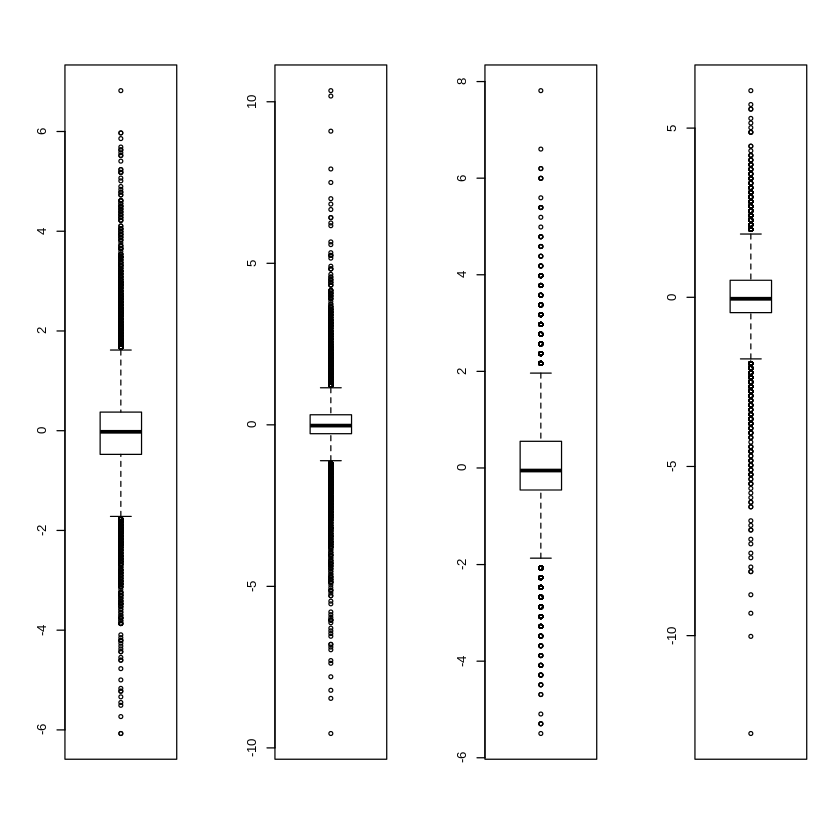

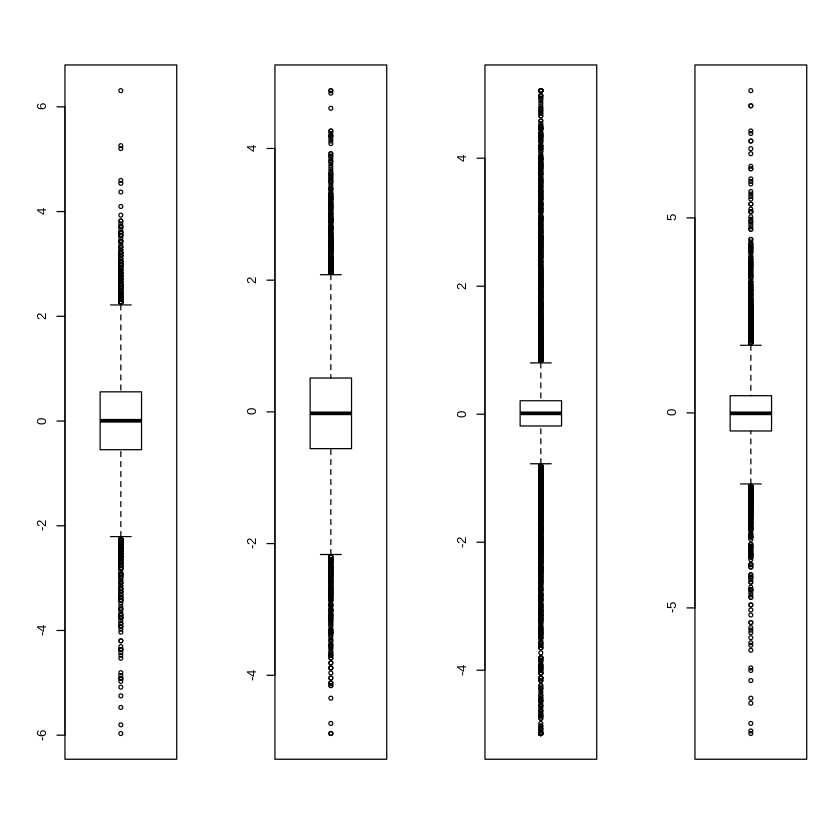

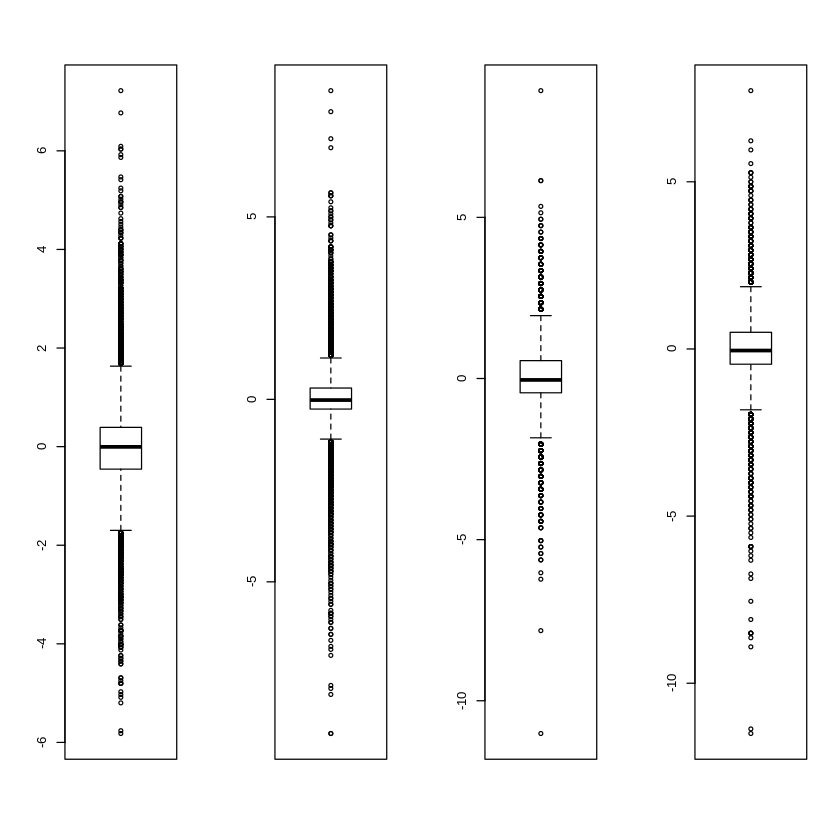

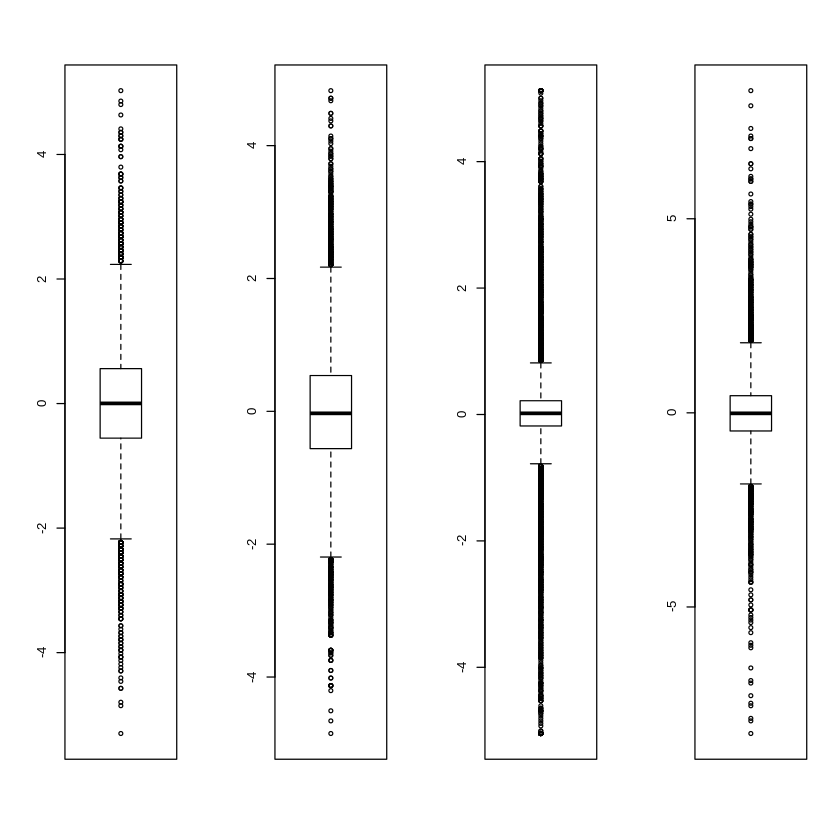

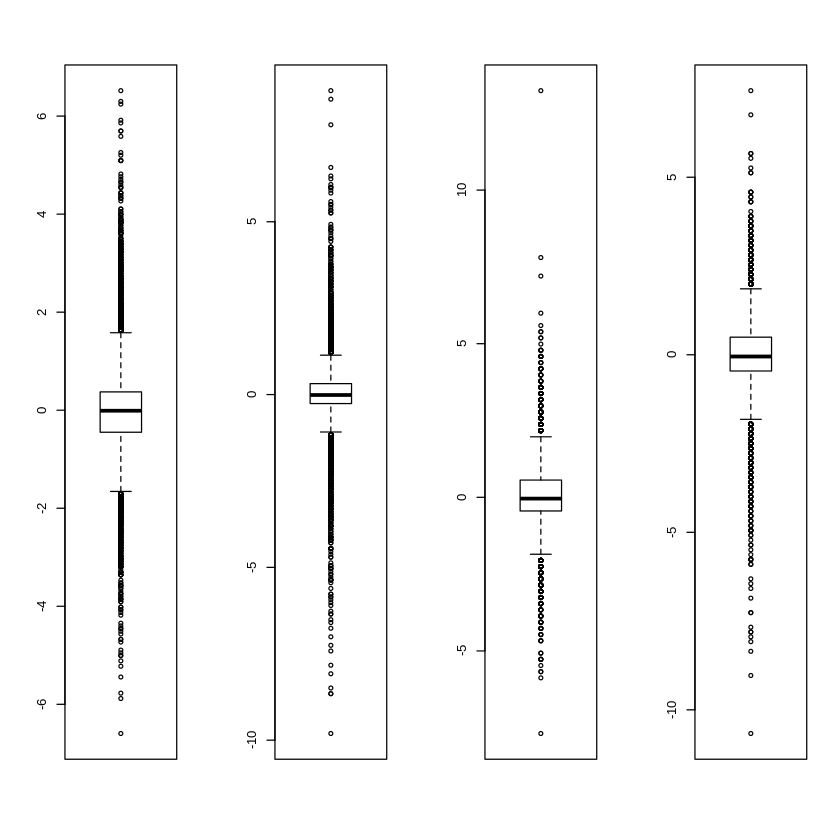

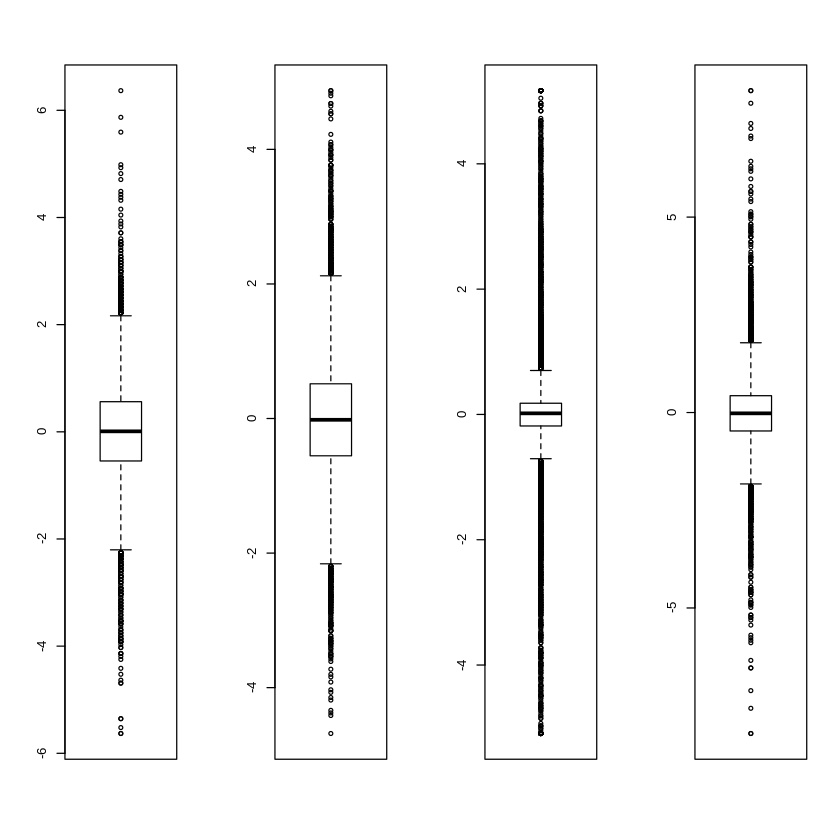

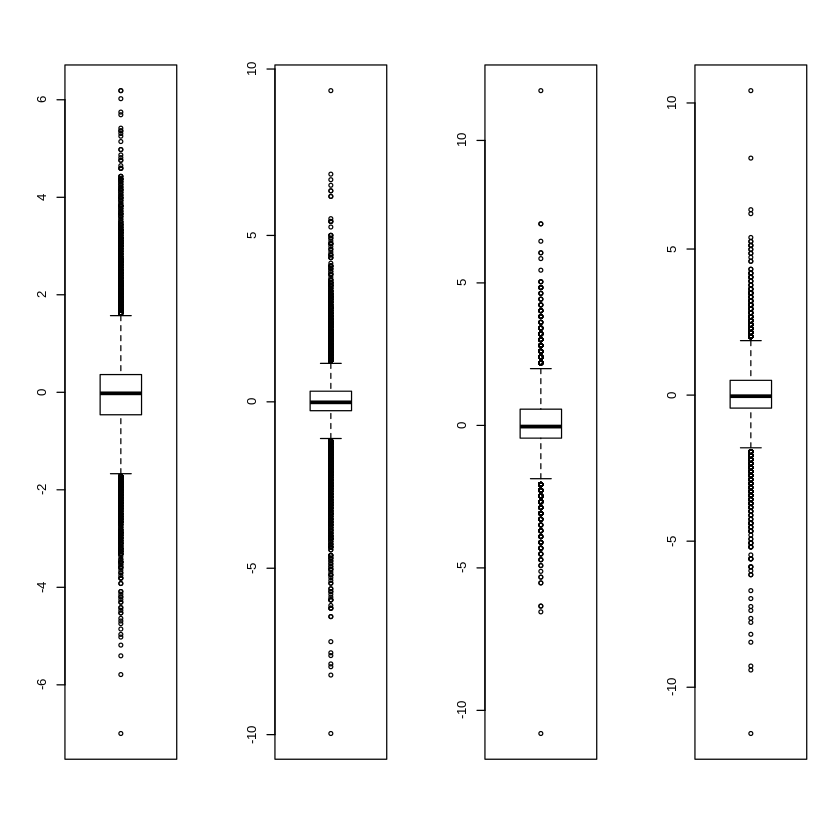

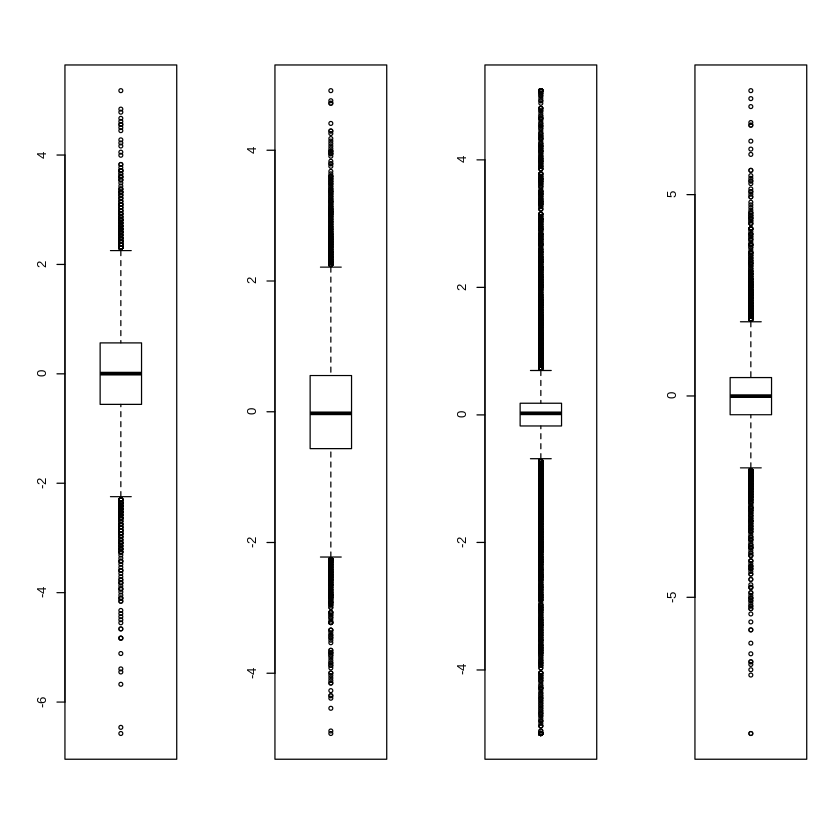

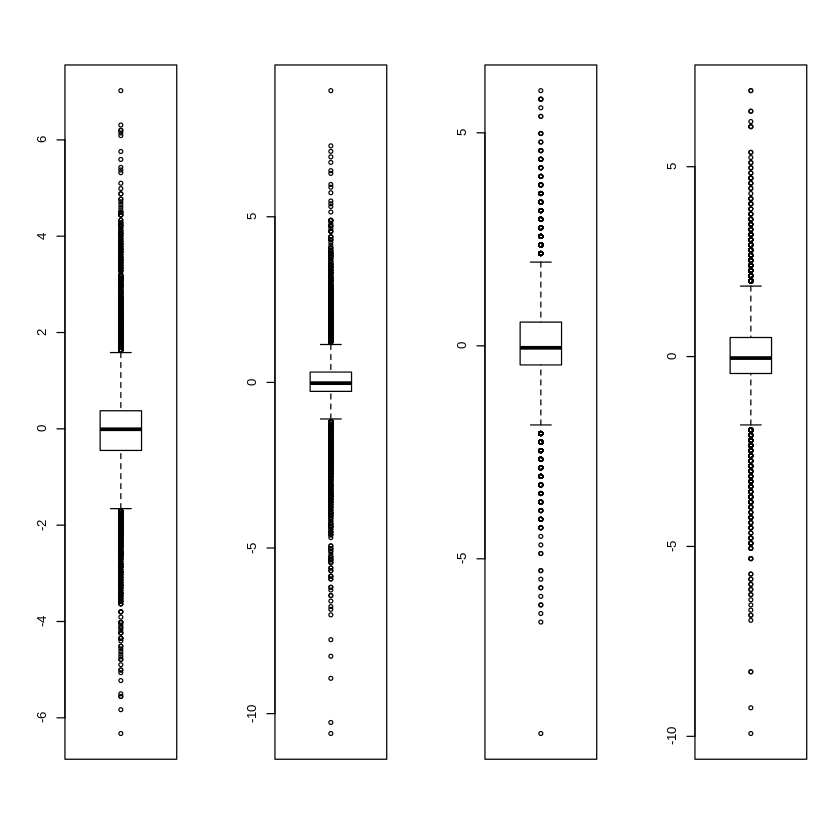

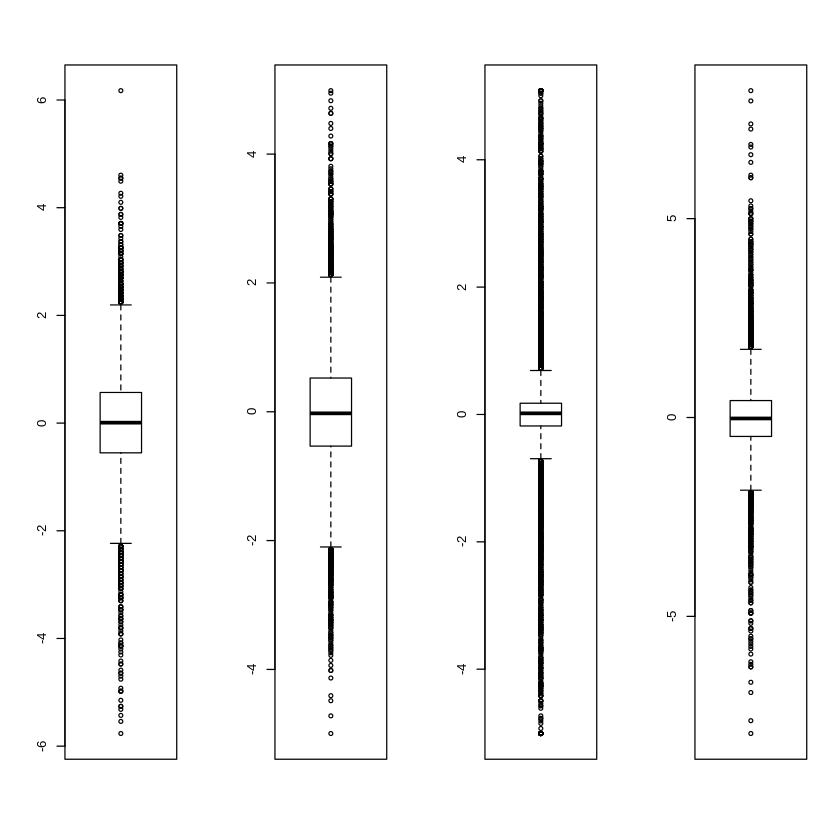

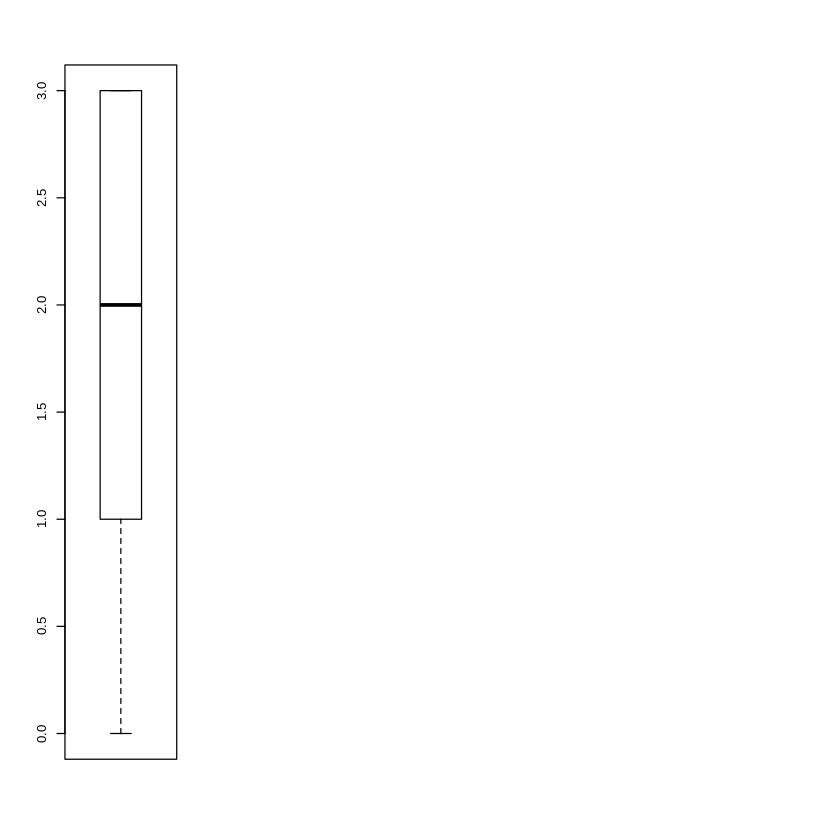

In [0]:
data <- scale(dataRAW[1:64], center = TRUE, scale = TRUE)
data <- cbind(data,dataRAW$V65)

dim(data)
head(data, 10)
summary(data)

#outliers <- 0
par(mfrow=c(1,4))
for(i in 1:65) {
  lista <- boxplot(data[,i], main=names(data)[i])
  #outliers <- outliers + length(lista$out)
}
#print("Numero de outliers =")
#print(outliers)

Vemos que el escalado no ha cambiado nada, con lo cual podemos decir que nuestros datos ya se encontraban escalados. Sin embargo, decidimos dejarlos escalados al ser una operación que no elimina información y permite un tratamiento correcto entre las variables.

# Preprocesamiento de datos

Nuestros datos no tienen valores nulos por lo tanto no hay ni que analizar ni que imputarle valores a ningún campo nulo. Pero sí presenta un gran número de valores outliers o valores atipicos. Vamos a proceder a remover la mayoría


## Análisis de valores atípicos .

Antes de seguir, vamos a dividir nuestro datasheet por cada clase presente, para así disminuir el error en la detección de valores outliers.

In [0]:
data0 <- data[which(data[,65] == 0), 1:65 ]
data1 <- data[which(data[,65] == 1), 1:65 ]
data2 <- data[which(data[,65] == 2), 1:65 ]
data3 <- data[which(data[,65] == 3), 1:65 ]

dim(data0)
dim(data1)
dim(data2)
dim(data3)

[1] 2910   65

[1] 2903   65

[1] 2943   65

[1] 2922   65

Usaremos el algoritmo **LOF** de la libreria **DDoutlier** para calcular un valor entre 0 e inf, de forma que, cuanto más cercano al 0 menos atípico (por lo tanto más atipico cuanto más lejano al 0 se encuentre)

Más documentación puede encontrarse [aquí](https://cran.r-project.org/web/packages/DDoutlier/DDoutlier.pdf)

In [0]:
if (!requireNamespace("DDoutlier"))
  install.packages("DDoutlier")
library(DDoutlier)

In [0]:
outlier_score0 <- LOF(data0, k= 40)
outlier_score1 <- LOF(data1, k= 40)
outlier_score2 <- LOF(data2, k= 40)
outlier_score3 <- LOF(data3, k= 40)

El algoritmo previo nos genera una puntuación para cada fila de nuestro conjunto de datos, de forma que:
- Una fila cercana a 1 representa una fila dentro de la densidad normal del conjunto de datos global.
- Menor a 1 presenta una densidad mayor respecto al promedio.
- Cuanto mayor a 1, una densidad mucho menor al promedio, es decir, valores alejados de un centro de gravedad y, por lo tanto, outliers. 

Con el siguiente código vamos a mostrar un histograma que muestra la frecuencia de esta puntuación para todo nuestro conjunto de datos:

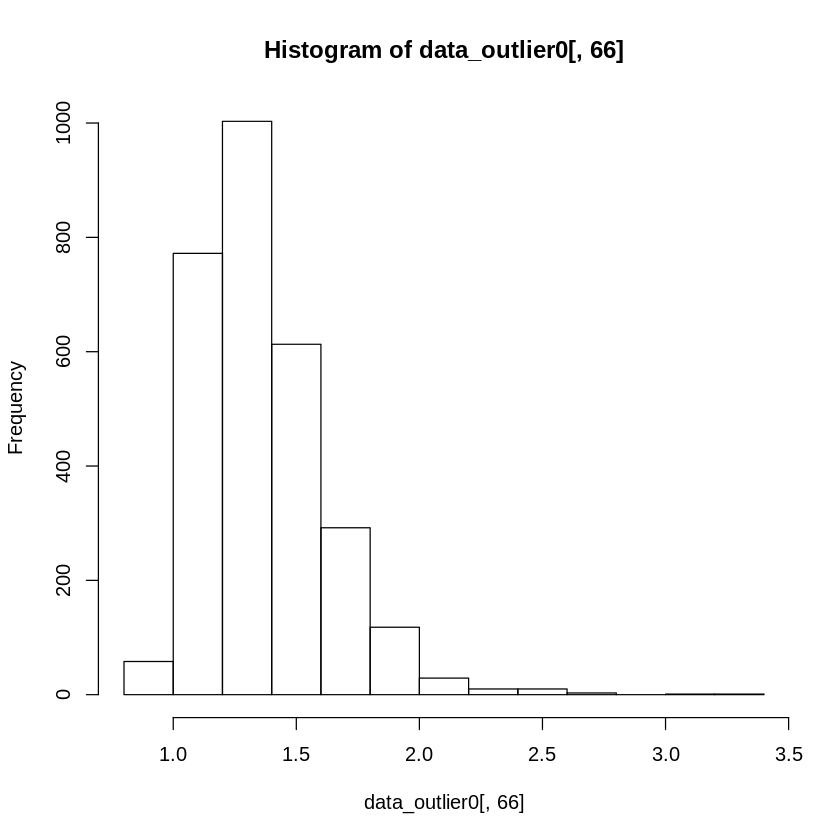

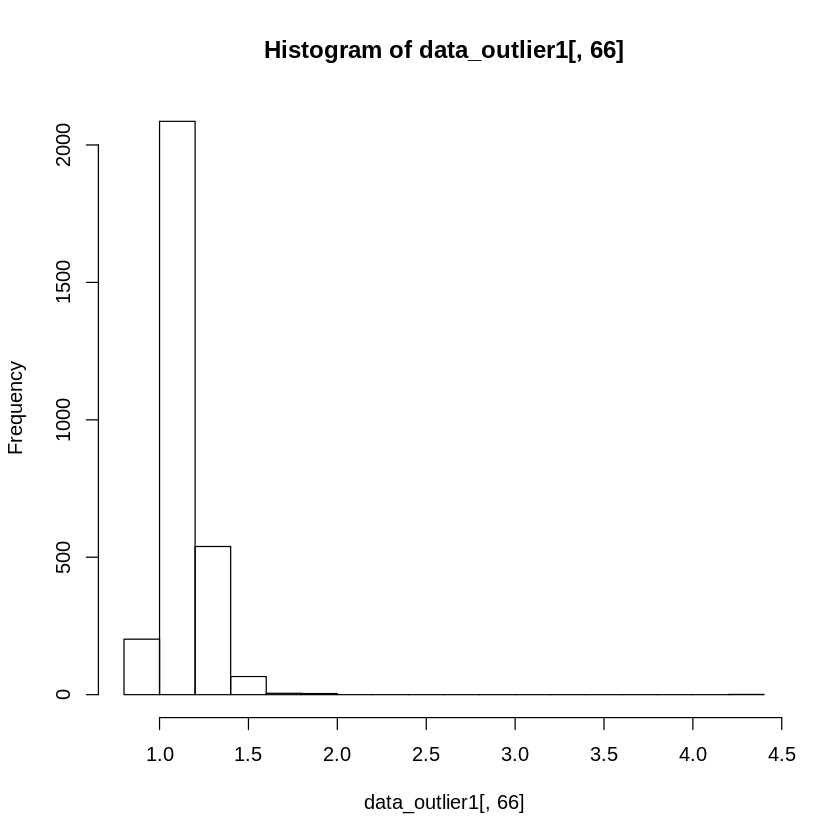

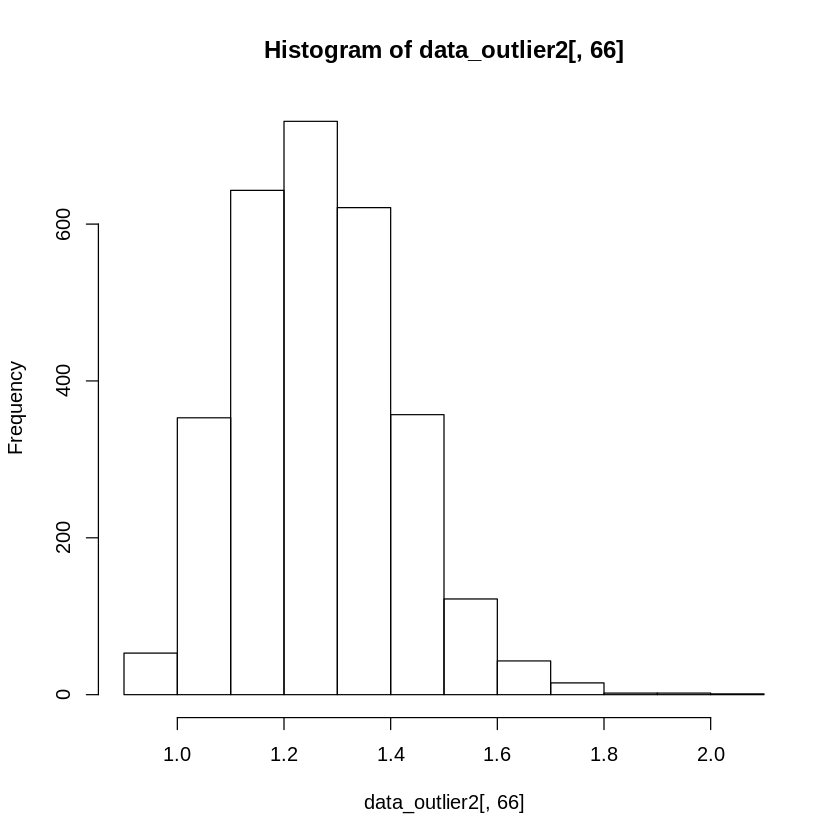

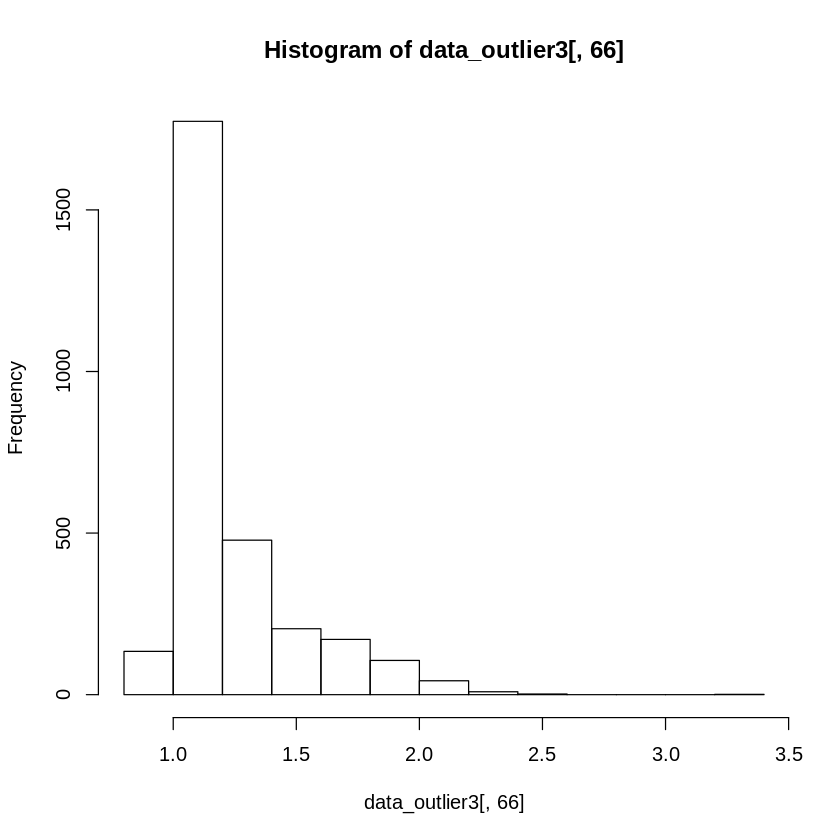

In [0]:
data_outlier0 <- cbind(data0, outlier_score0)
data_outlier1 <- cbind(data1, outlier_score1)
data_outlier2 <- cbind(data2, outlier_score2)
data_outlier3 <- cbind(data3, outlier_score3)

hist(data_outlier0[,66])
hist(data_outlier1[,66])
hist(data_outlier2[,66])
hist(data_outlier3[,66])

Vemos más o menos que los valores atípicos empiezan:
- Para clase 0 , en score >= ~2.0
- Para clase 1, en score >= ~1.4
- Para clase 2, en score >= ~1.6
- Para clase 3, en score >= ~1.8

Tiene sentido, aunque los sensores sean capaces de detectar rotaciones completas ( de -128º a 127º), es difícil que un brazo humano normal (exluyendo gente con propiedades únicas, como huesos muy elásticos) pueda hacer giros que excedan el rango de ~-40º y ~40º (y esta es una de las razones por lo cual nuestros datos se encuentren muy centrados.

Según el criterio anterior, empezamos a seleccionar, para cada datasheet, las filas con un score inferior o igual y volvemos a combinar todos los datasheet en uno solo.

[1] 2619   65

[1] 2692   65

[1] 2758   65

[1] 2386   65

[1] 10455    65

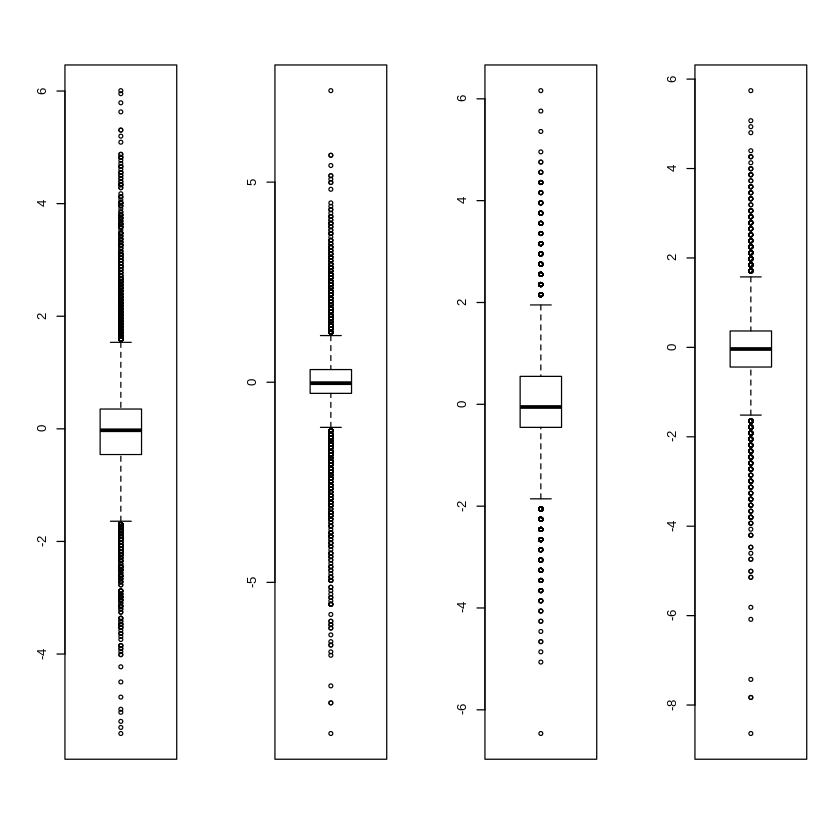

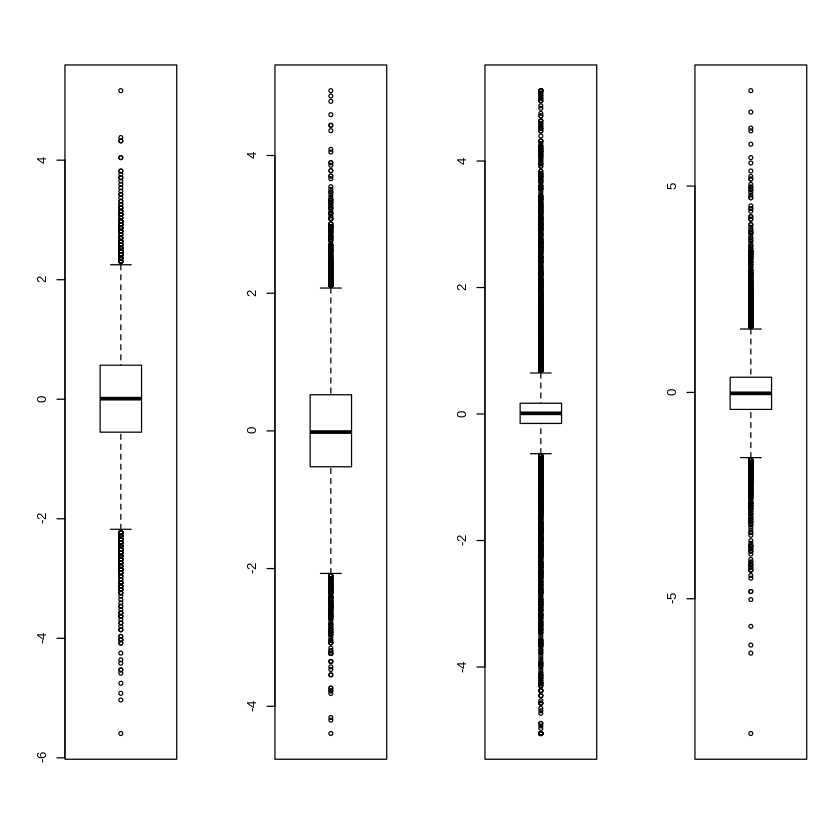

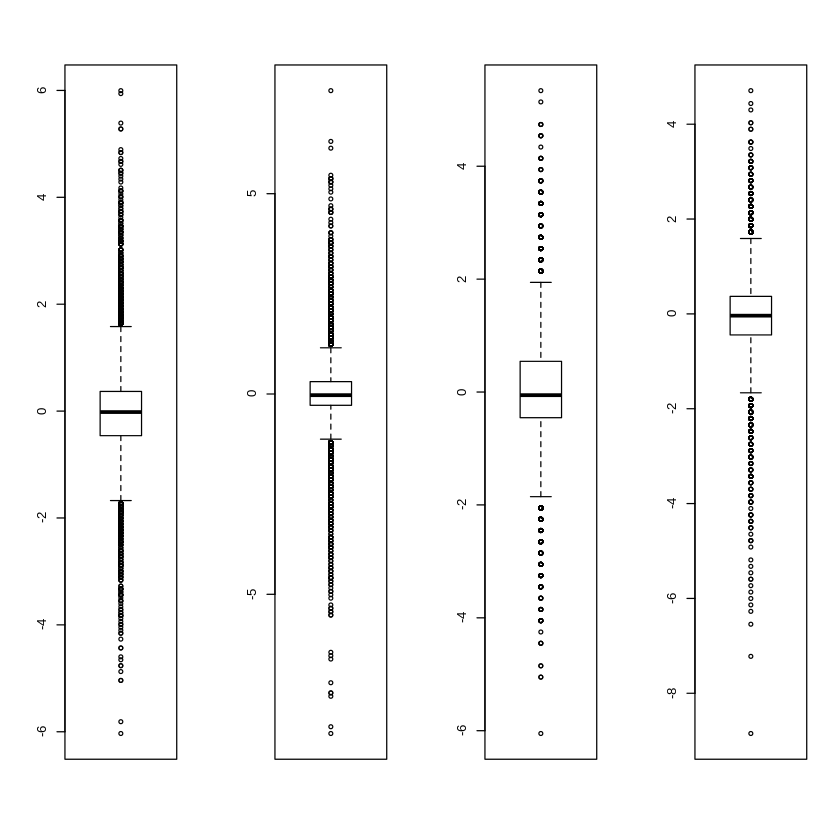

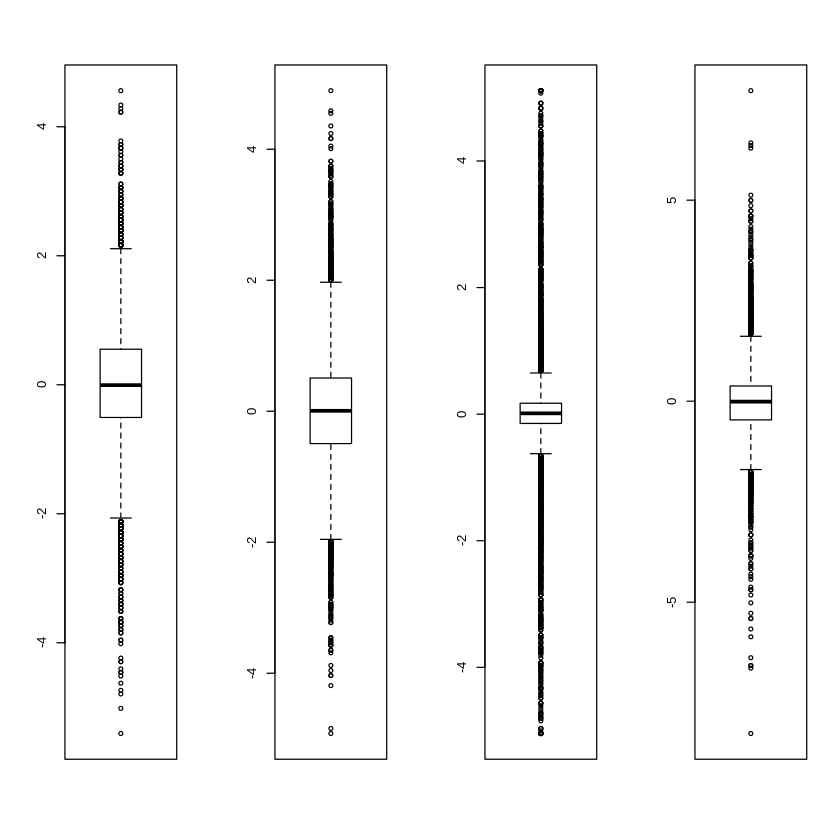

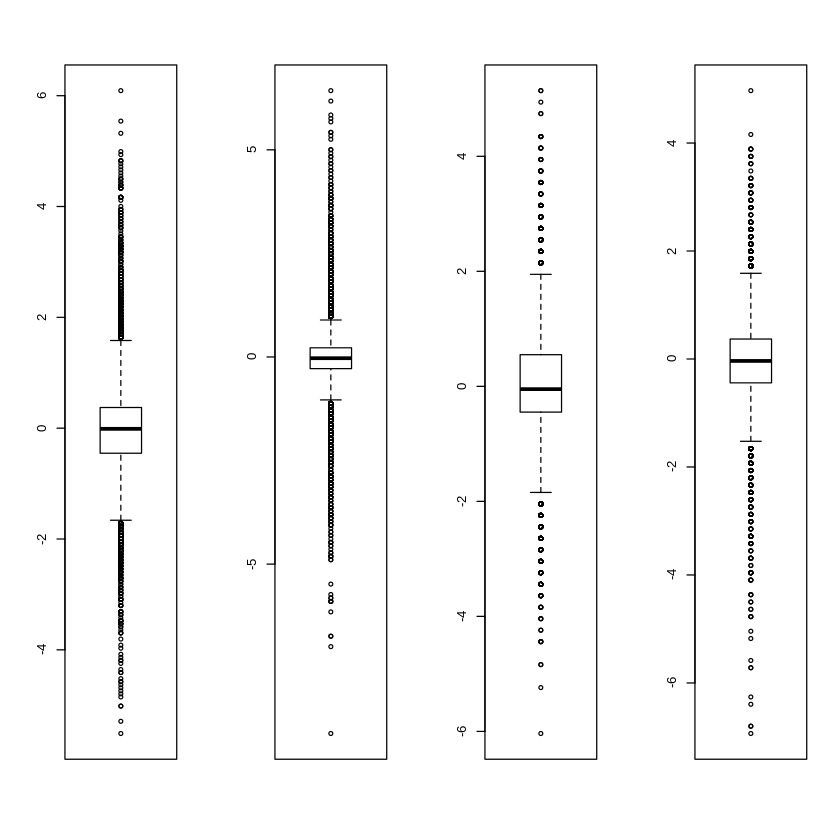

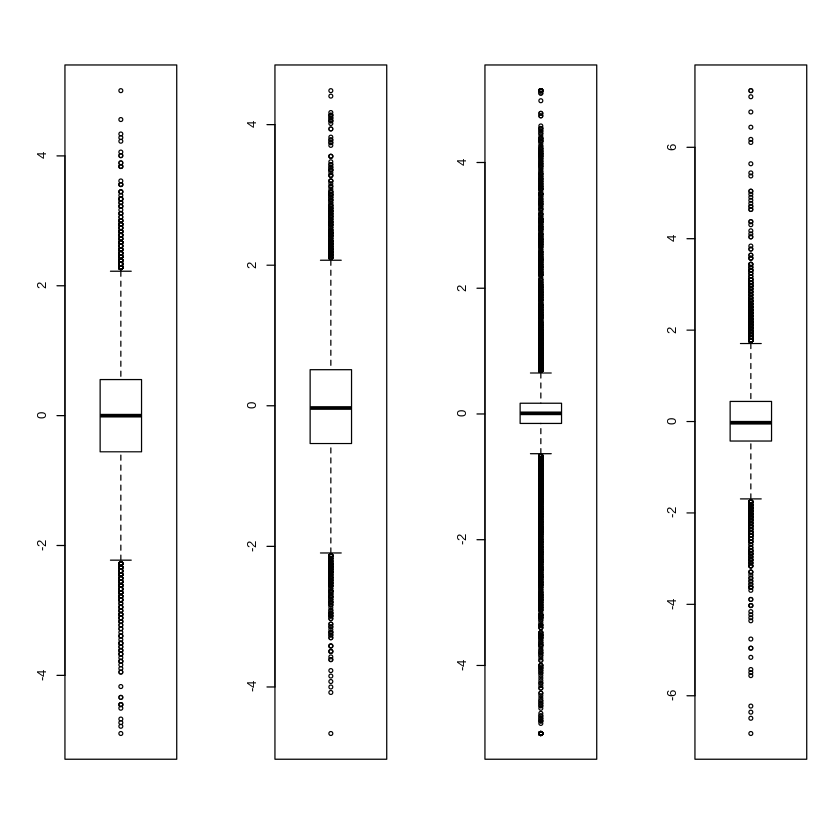

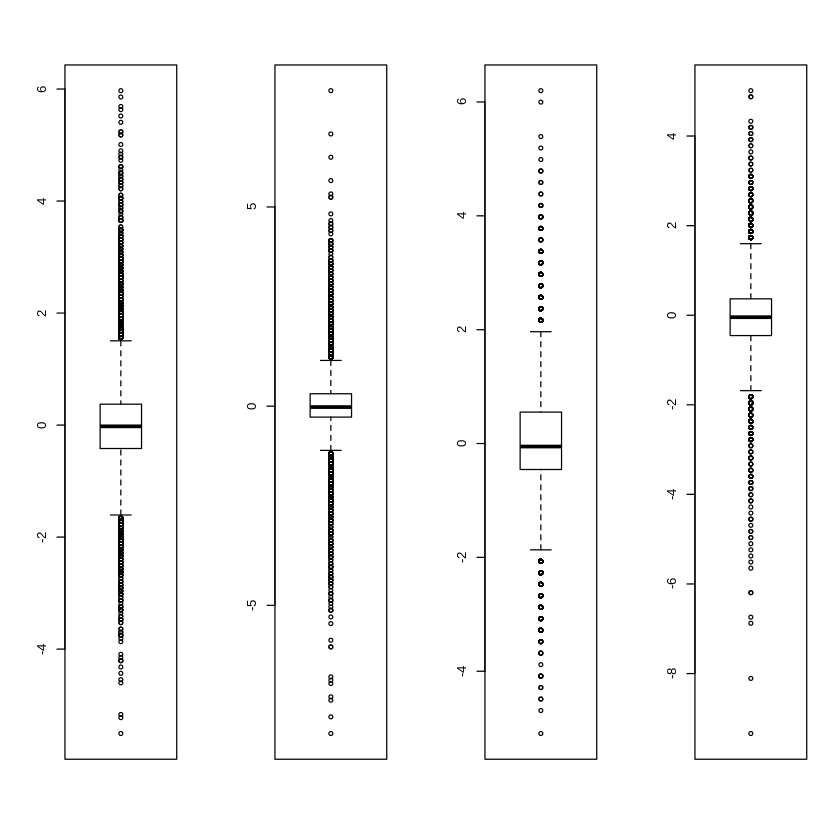

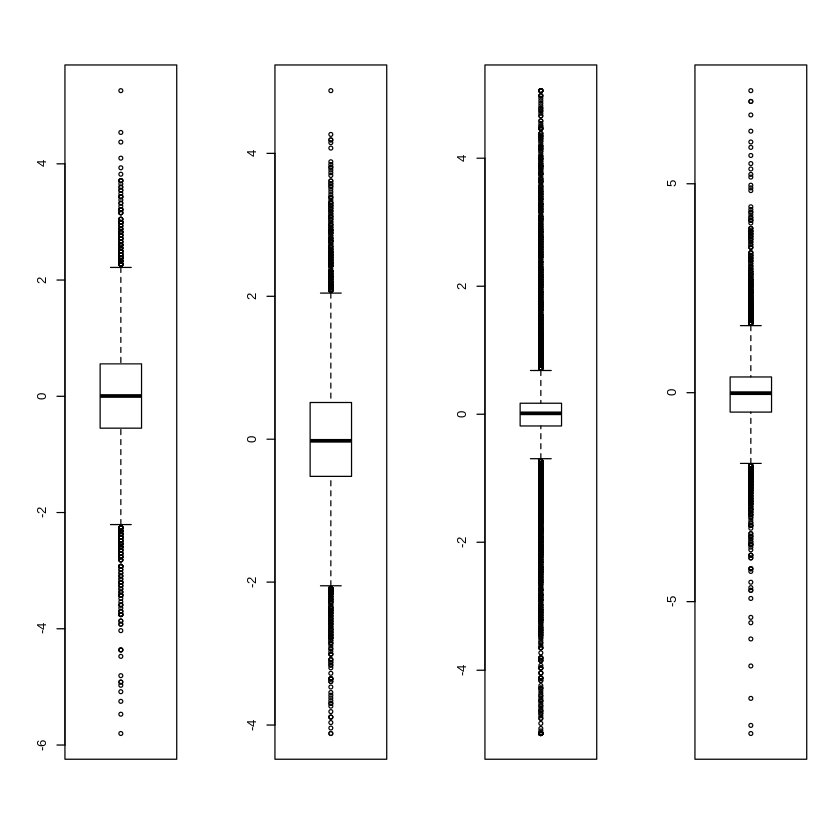

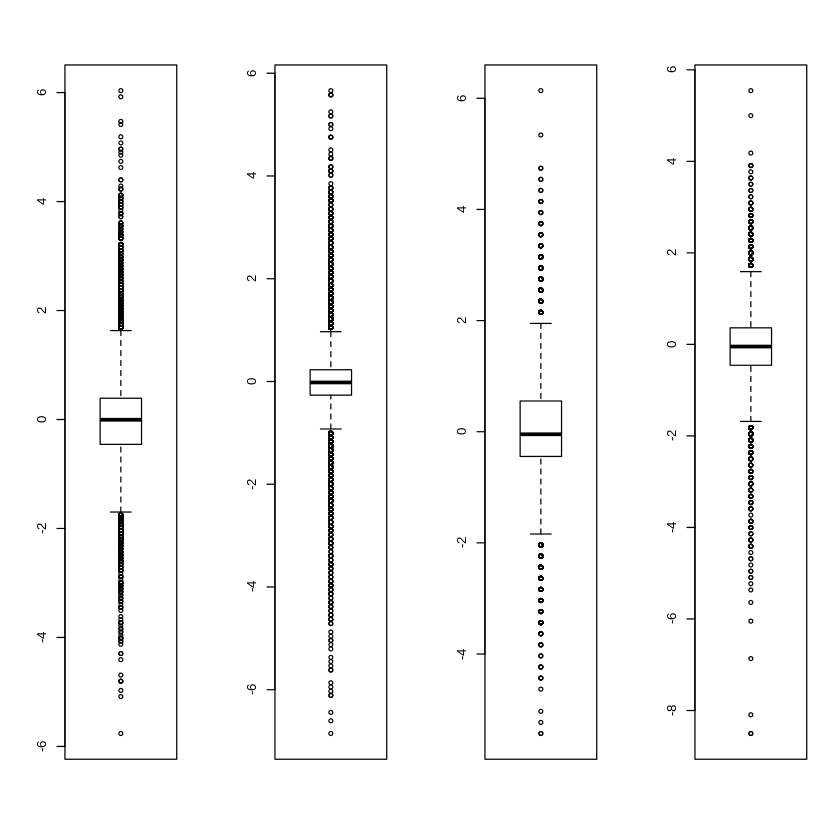

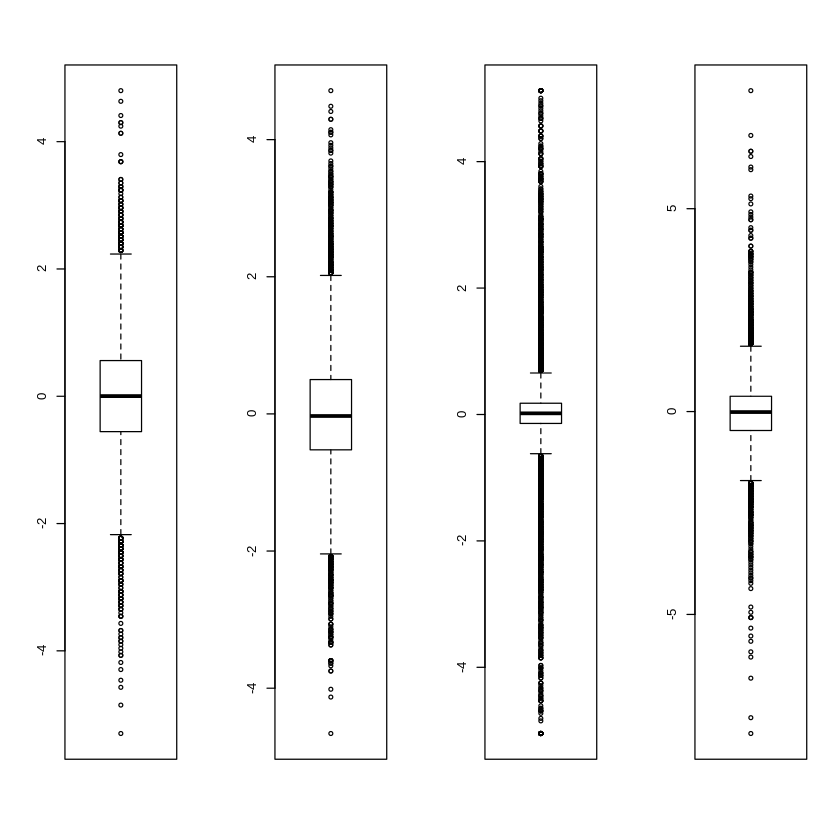

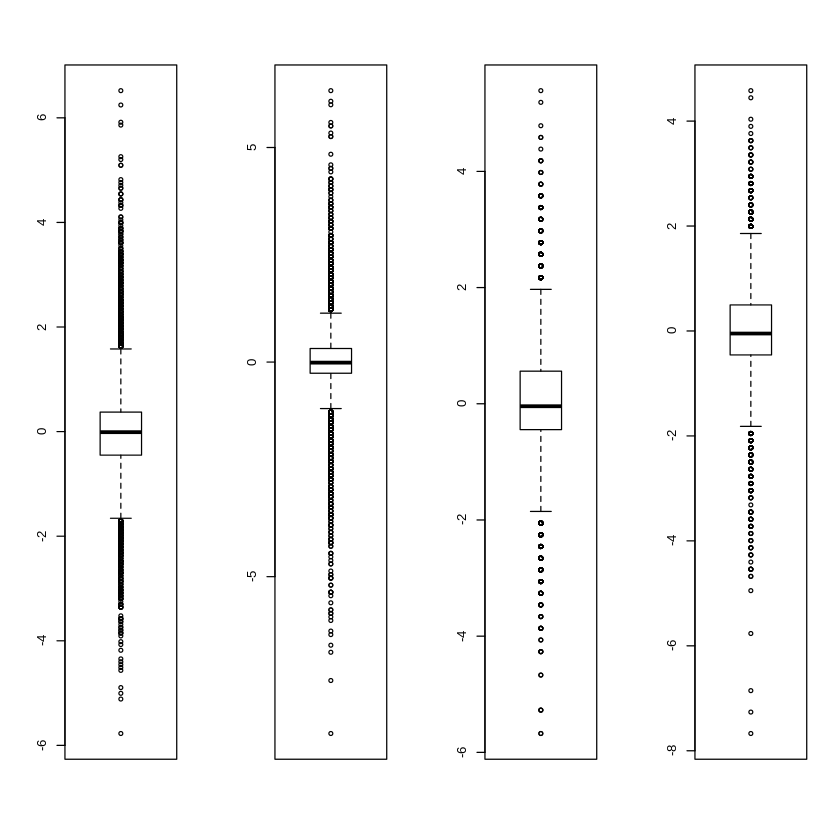

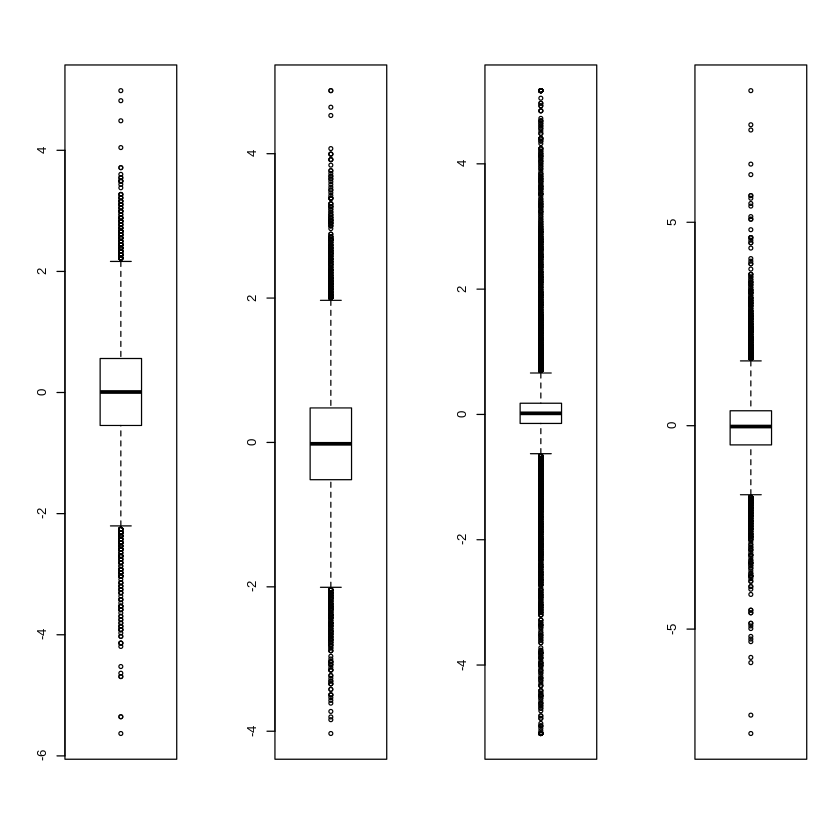

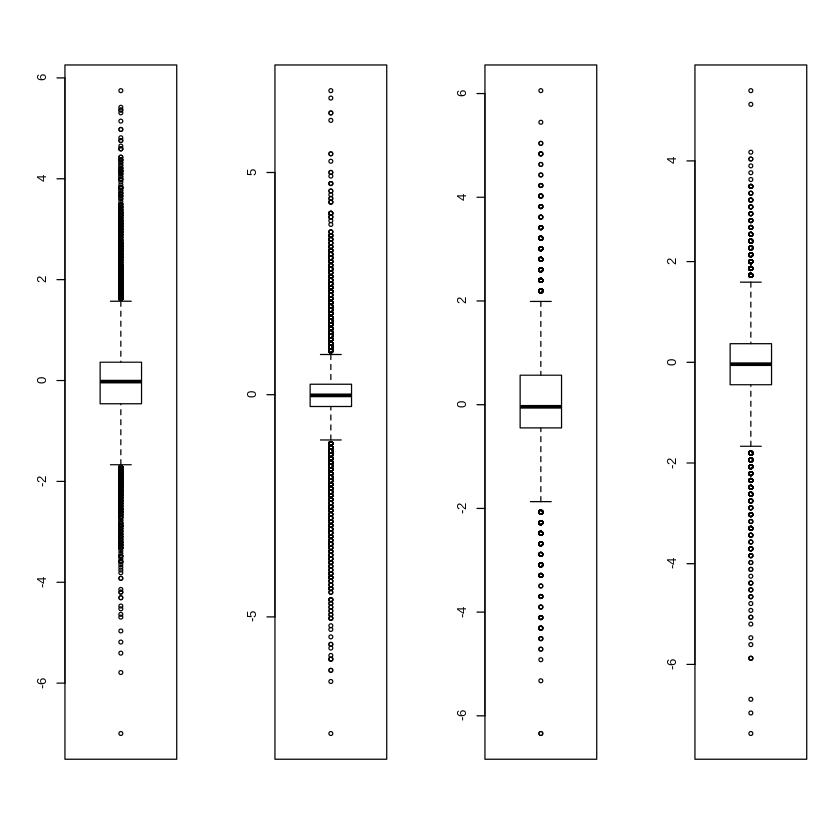

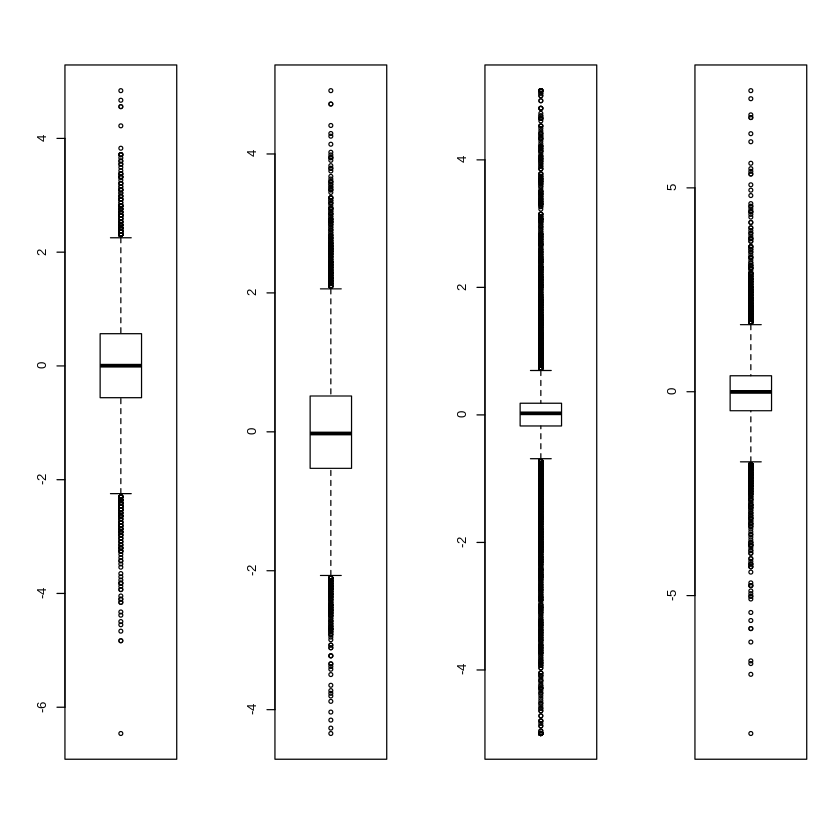

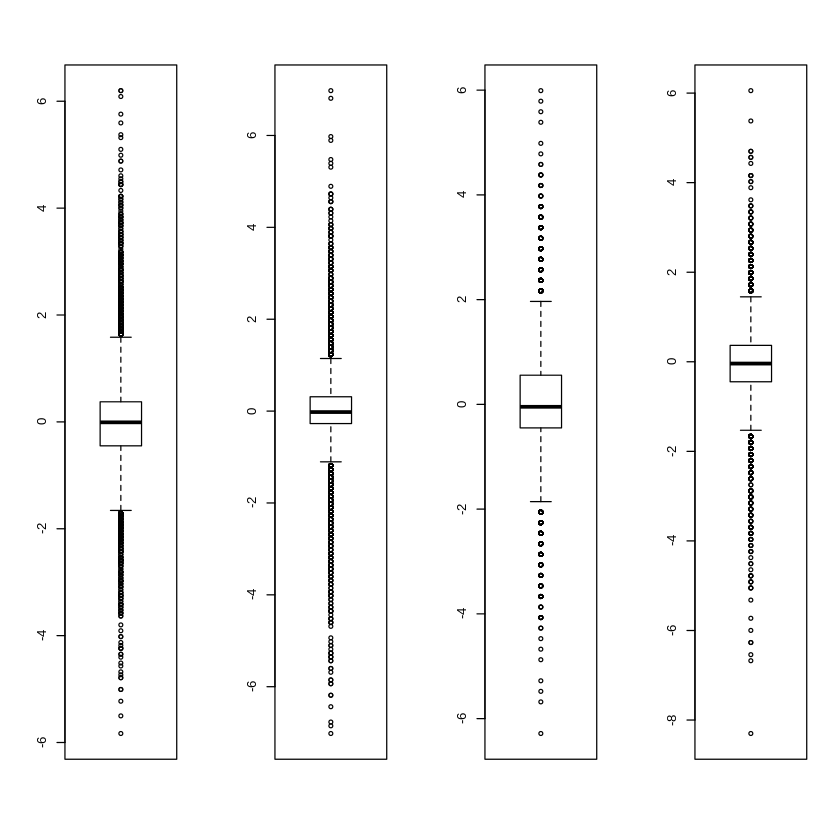

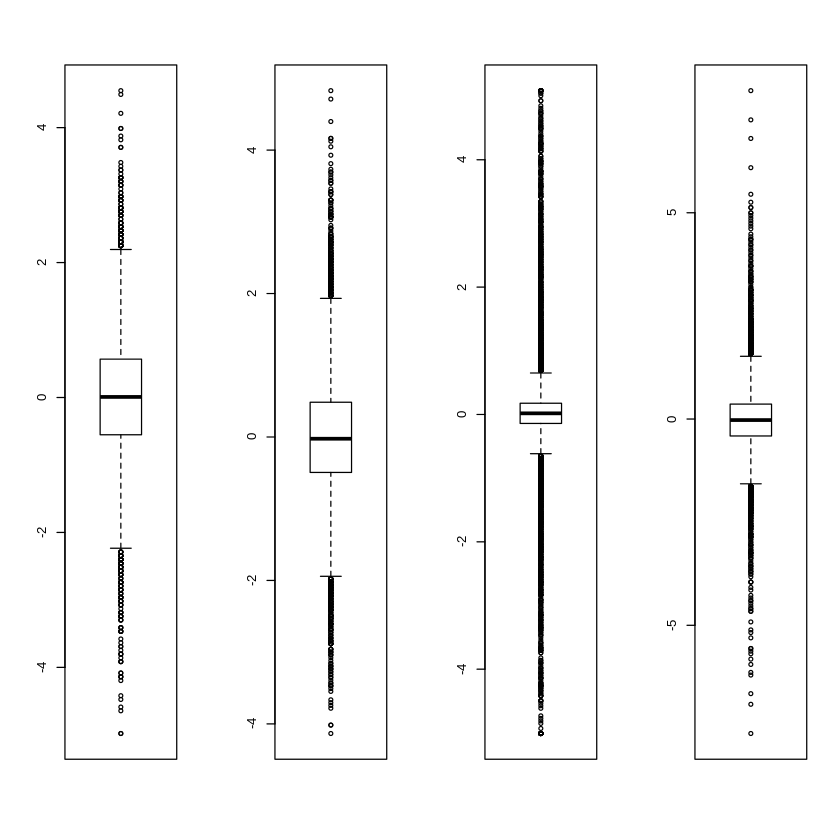

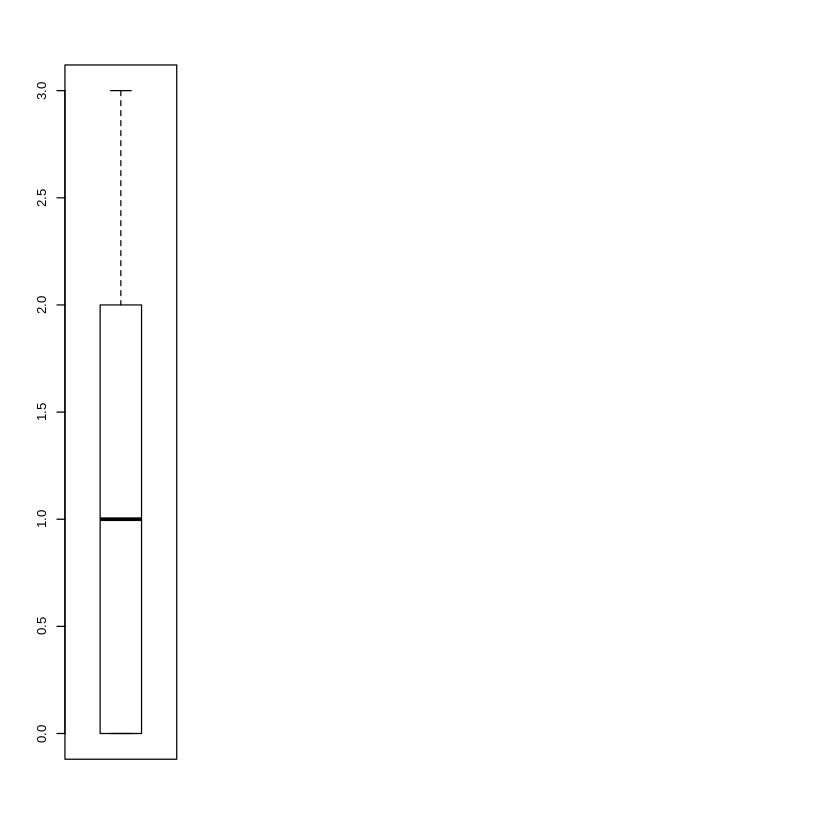

In [0]:
dataCleaned0 <- data_outlier0[which(data_outlier0[,66] <= 1.7), 1:65 ]
dim(dataCleaned0)
dataCleaned1 <- data_outlier1[which(data_outlier1[,66] <= 1.3), 1:65 ]
dim(dataCleaned1)
dataCleaned2 <- data_outlier2[which(data_outlier2[,66] <= 1.5), 1:65 ]
dim(dataCleaned2)
dataCleaned3 <- data_outlier3[which(data_outlier3[,66] <= 1.4), 1:65 ]
dim(dataCleaned3)

dataCleaned <- rbind(dataCleaned0,dataCleaned1,dataCleaned2,dataCleaned3)

dim(dataCleaned)
#outliers <- 0
par(mfrow=c(1,4))
for(i in 1:65) {
  lista <- boxplot(dataCleaned[,i], main=names(dataCleaned)[i])
  #outliers <- outliers + length(lista$out)
}
#print("Numero de outliers segun boxPlot =")
#print(outliers/64)

Los valores previos siempre podemos ir modificándolos para obtener el mejor resultado final. De momento, usaremos estos. Al observar las dimensiones podemos ver que hemos desbalanceado un poco el tamaño de las clases, pero dado el tamaño de nuestro datasheet, la diferencia es mínima.

## Análisis de correlación

Una vez hemos limpiado parte de nuestros valores outliers, procedemos a realizar el análisis de componentes principales.

Vamos a visualizar una matriz de gráficas de correlación. Como siempre, lo primero es cargar las librerías necesarias.

In [0]:
if ( !requireNamespace("corrplot") ) {
  install.packages("corrplot")
}
library(corrplot)

if ( !requireNamespace("caret") ) {
  install.packages("caret")
}
library(caret)


if ( !requireNamespace("e1071") ) {
  install.packages("e1071")
}
library(e1071)
if ( !requireNamespace("kernlab") ) {
  install.packages("kernlab")
}
library(kernlab)
if (!requireNamespace("randomForest"))
  install.packages("randomForest")
library(randomForest)


Tras instalar y cargar nuestras librerías correctamente, procedemos a visualizar la correlación entre nuestros predictores y la clase:

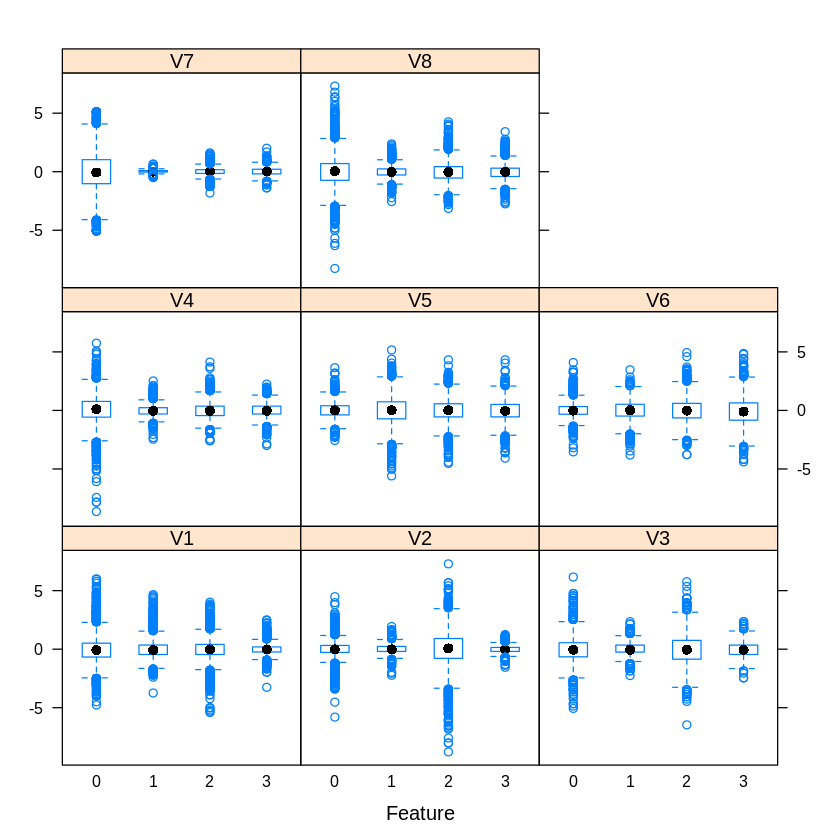

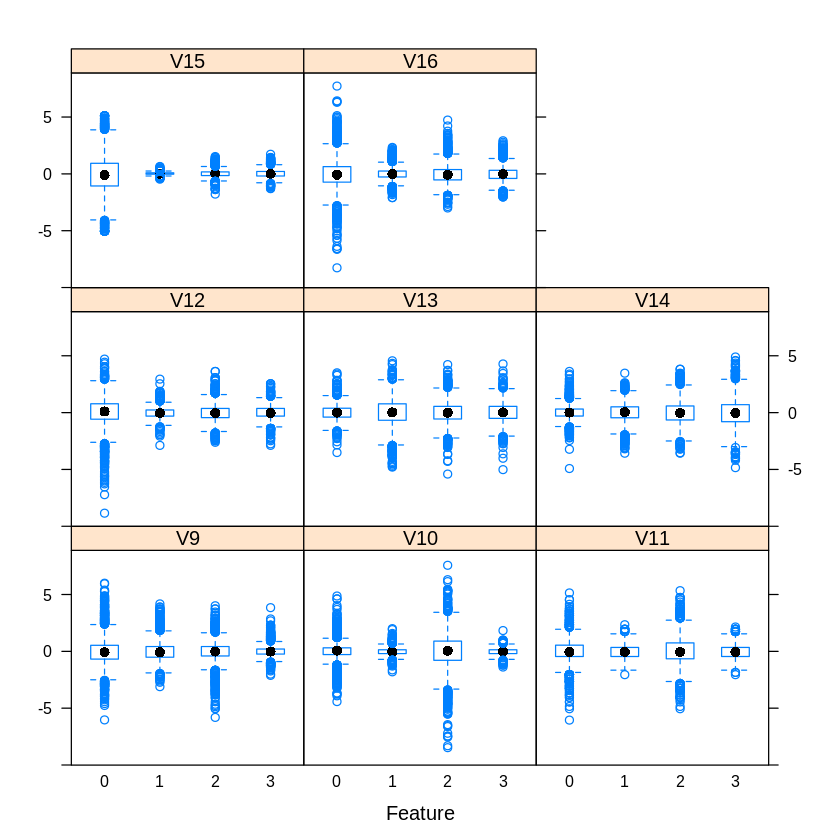

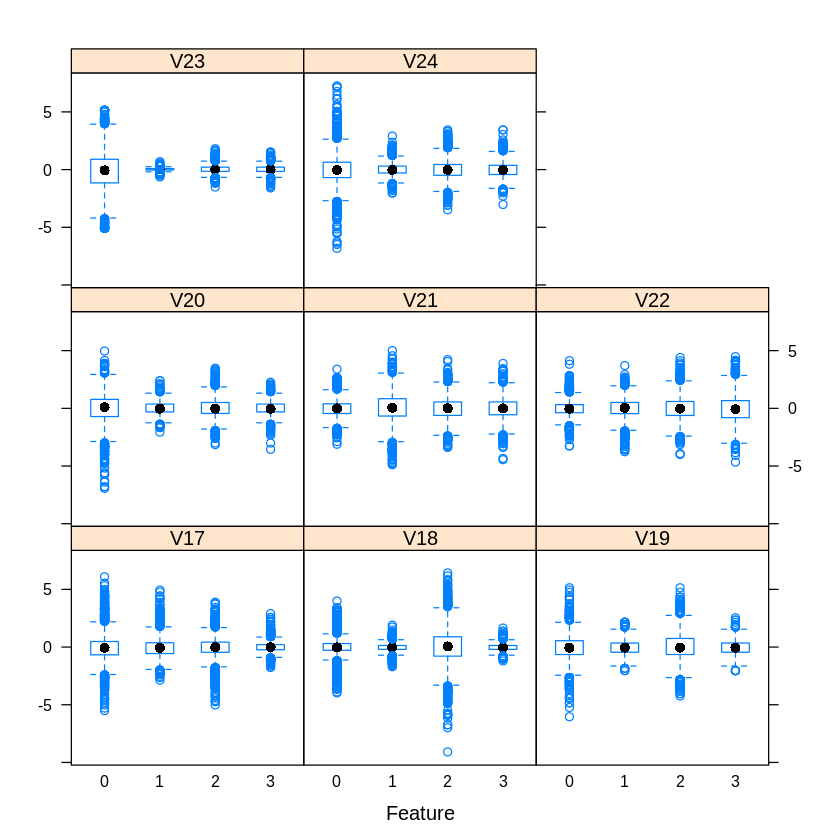

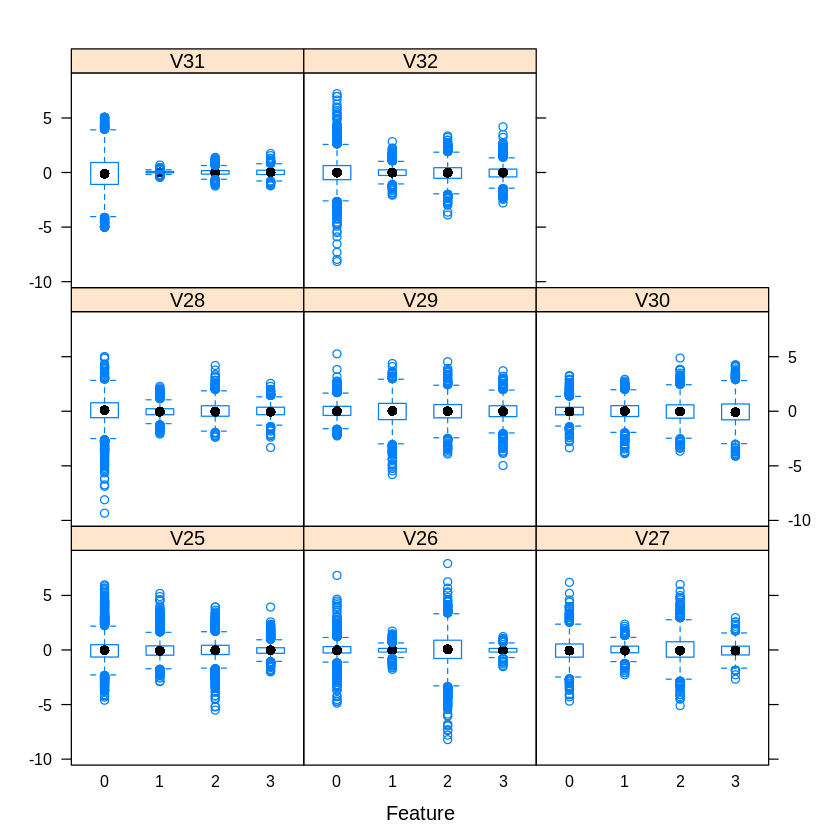

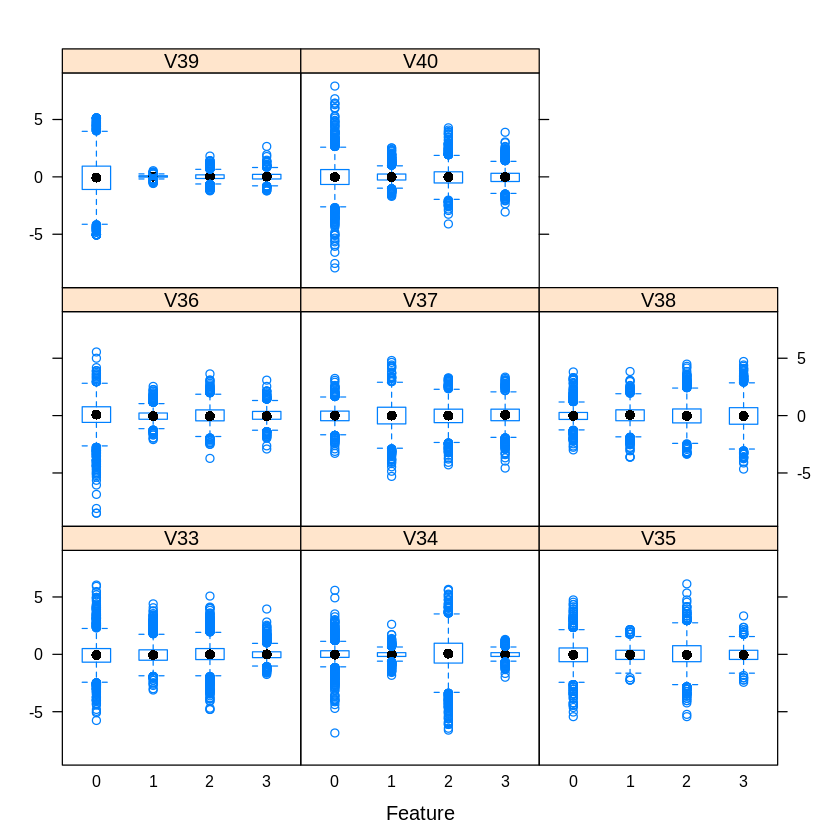

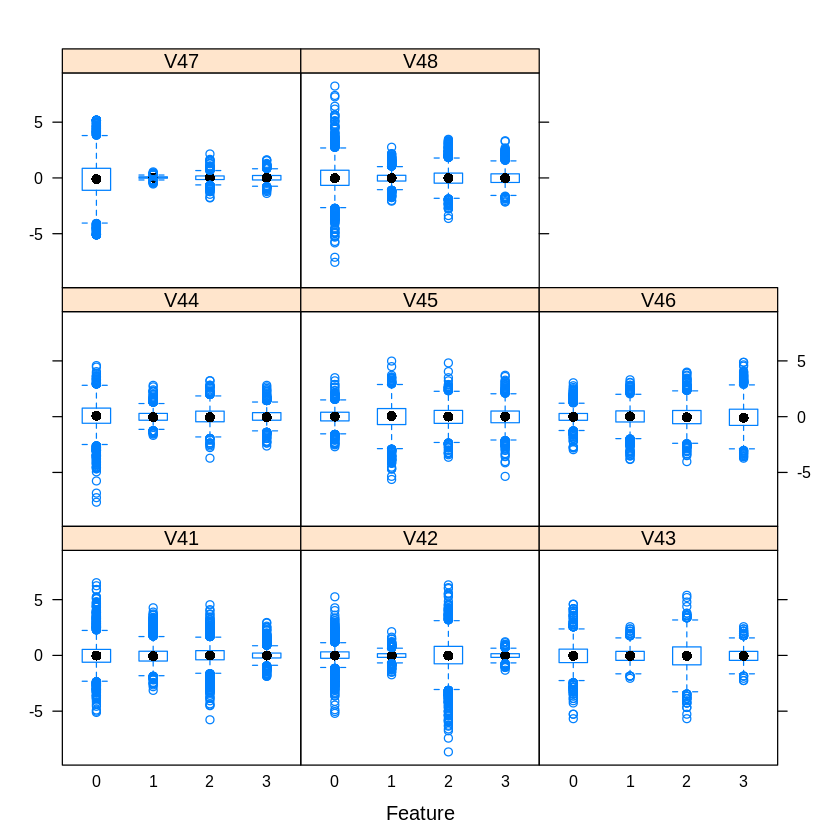

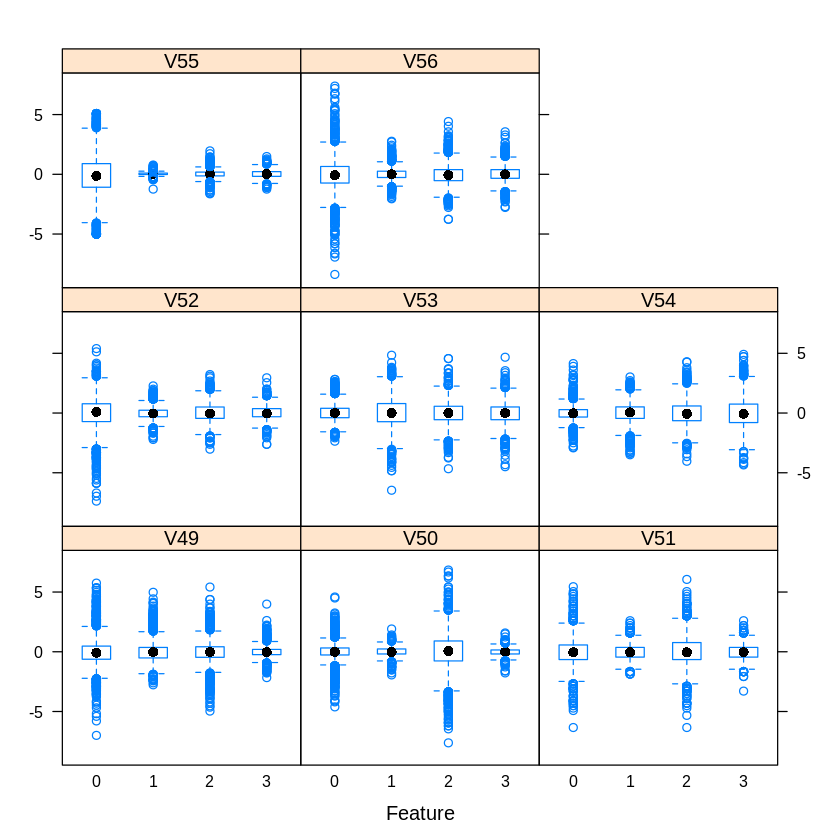

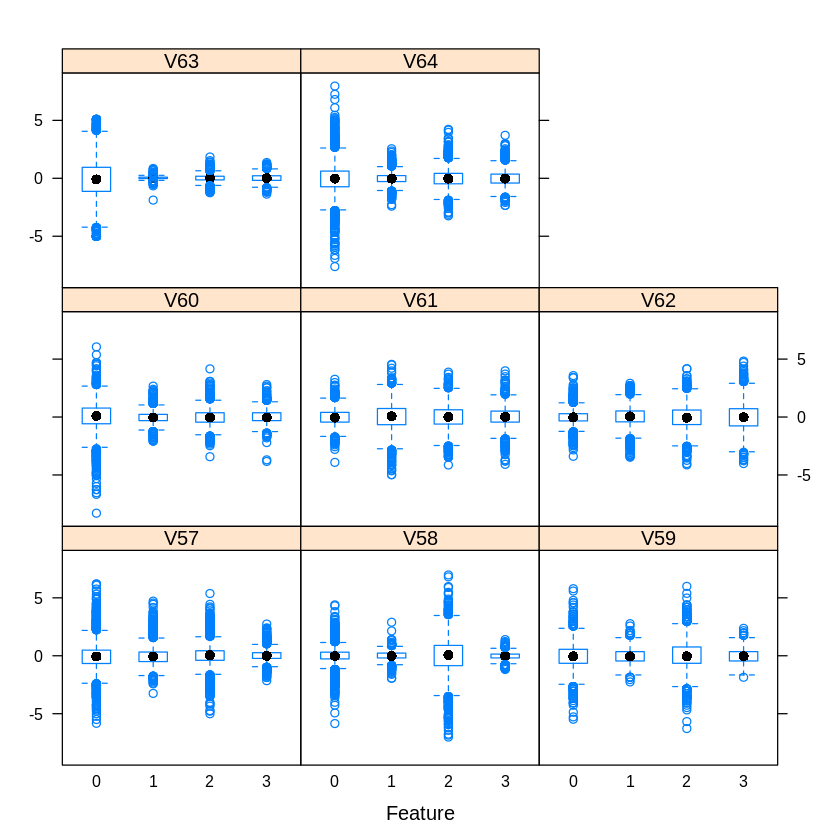

In [0]:
x1 <- dataCleaned[,1:8]
x2 <- dataCleaned[,9:16]
x3 <- dataCleaned[,17:24]
x4 <- dataCleaned[,25:32]
x5 <- dataCleaned[,33:40]
x6 <- dataCleaned[,41:48]
x7 <- dataCleaned[,49:56]
x8 <- dataCleaned[,57:64]
y <- as.factor(dataCleaned[,65])

#scales <- list(x=list(relation="free"), y=list(relation="free"))
#featurePlot(x=x1, y=y, plot="density", scales=scales, )
featurePlot(x=x1, y=y, plot="box")
featurePlot(x=x2, y=y, plot="box")
featurePlot(x=x3, y=y, plot="box")
featurePlot(x=x4, y=y, plot="box")
featurePlot(x=x5, y=y, plot="box")
featurePlot(x=x6, y=y, plot="box")
featurePlot(x=x7, y=y, plot="box")
featurePlot(x=x8, y=y, plot="box")

Podemos ver que existen sensores con una mayor correlación a un gesto que otros. Por ejemplo:

* En sensor 7, cada músculo (V17,V15,V23, V31 ,... ) tiene una gran cantidad de valores atipicos para gesto 0.

* El sensor 8 tiene la dispersión más grande para gesto 0​.

* El sensor 2 tiene la dispersión más grande para gesto 2​.

* El gesto 3, de medía, presenta los valores menos dispersos en conjunto para todos los sensores.

El siguiente paso es mostrar la matriz de gráficas de correlación:

png 
  2

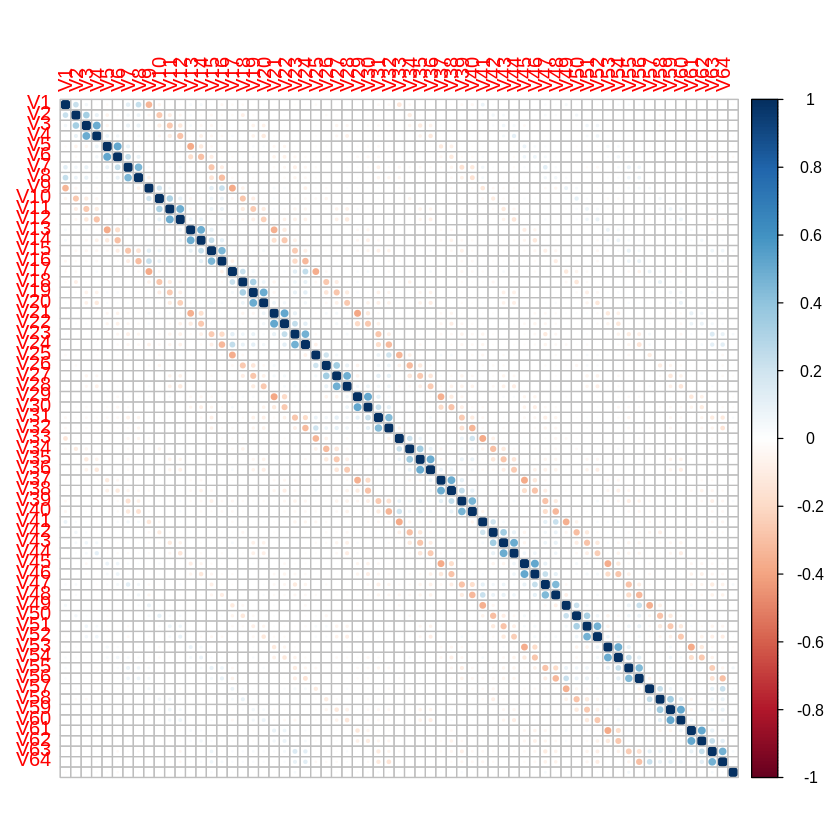

In [0]:
correlations <- cor(dataCleaned[,1:65])
# create correlation plot
corrplot(correlations, method="circle")

#Más grande para ver con más detalle
png(file="corr.png", res=300, width=6000, height=6000)
corrplot.mixed(correlations,lower = "number" , upper = "ellipse" )
dev.off()

Podemos ver que los sensores tienen una correlación directa moderada (~0.5) con el sensor vecino y una casi insignificante correlación negativa cuando se trata de la medición del mismo sensor 5ms después. 

Dado que correlación no implica redundancia, se decide averiguar la mejor selección de variables a la hora de predecir la clase mediante un análisis de componentes principales con el algoritmo **randomForest**

Como siempre, antes de ello, cargamos las librerías necesarias:

In [0]:
if (!requireNamespace("doParallel"))
  install.packages("doParallel")
library(doParallel) #Paralelismo... # Probamos

parallel::detectCores()

cl <- makePSOCKcluster(2) # Probar en Colab

registerDoParallel(cl) 

Dada la complejidad del algoritmo, conviene ejecutarlo con varios núcleos, para ello el "registerDoParallel". Posteriormente ponemos a ejecutar el algoritmo:

**NOTA**: No se conoce un tiempo estimado de ejecución del siguiente algoritmo.

In [0]:
# treebagfuncs
set.seed(230520202)

options(warn=-1)

subsets <- c(1:64)

ctrl <- rfeControl(functions = rfFuncs,
                   method = "repeatedcv",
                   repeats = 1, # Las primeras veces es recomendable hacer el problema lo más pequeño para reducir tiempos
                   verbose = FALSE)

lmProfile <- rfe(x=dataCleaned[, 1:64], y=dataCleaned[, 65],
                 sizes = subsets,
                 rfeControl = ctrl)

lmProfile

Importancia <- varImp(lmProfile)
Importancia

Mostramos el ranking de las mejores variables a seleccionar:


**NOTA**: El algoritmo randomForest es incapaz de tratar con un conjunto de datos tan grande, y, si se ejecuta con un tamaño reducido (~700) los resultados que retorna no son concluyentes, sucesivas ejecuciones devuelven resultados diferentes y ninguna de ellas logra mejorar el resultado inicial (esto es, sin selección de variables). Y dado que el uso de otros algoritmos más rapidos (como treeBag) siguen sin mejorar el resultado inicial, antes que hacerlo a ojo, se decide excluir del proyecto la selección de variables fruto de un análisis de componentes.

In [0]:
Importancia <- varImp(lmProfile)
Importancia

Por último, sacamos por output el nuevo datasheet preprocesado para nuestro tramiento posterior

In [0]:
write.csv(dataCleaned,"/content/cleanedAll.csv", row.names = TRUE)

# Conclusión

Hemos tenido la suerte de tener un conjunto de datos bastante bien construido, sin valores nulos, sin desbalanceo de clases, únicamente presentando como problema una presencia alta de outliers por lo cual se ha decidido eliminar de los posibles valores outliers, los más infrecuentes. 

# Bibliografía

**"Machine Learning Mastery with R"** de Jason Brownlee

**"Feature Extraction. Foundations and Applications"**  de Isabelle Guyon, Steve Gunn y Masoud Nikravesh
